In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import month_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import warnings 
warnings.filterwarnings( "ignore")

C:\Users\rohan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\rohan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


## For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

### 1. Read the data as an appropriate Time Series data and plot the data.

In [2]:
rose1 = pd.read_csv("Rose.csv", parse_dates=True,squeeze=True,index_col=0)

In [3]:
rose1.head()

YearMonth
1980-01-01    112.0
1980-02-01    118.0
1980-03-01    129.0
1980-04-01     99.0
1980-05-01    116.0
Name: Rose, dtype: float64

In [4]:
rose1.tail()

YearMonth
1995-03-01    45.0
1995-04-01    52.0
1995-05-01    28.0
1995-06-01    40.0
1995-07-01    62.0
Name: Rose, dtype: float64

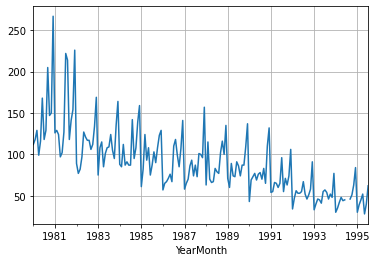

In [5]:
rose1.plot();
plt.grid()

In [6]:
rose2 = pd.read_csv("Rose.csv")

In [7]:
rose2.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


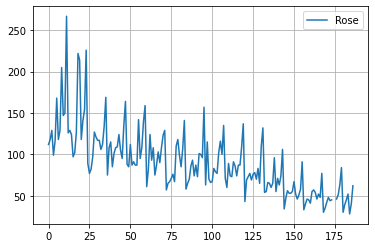

In [8]:
rose2.plot();
plt.grid()

In [9]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')

In [10]:
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [11]:
rose2['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
rose2.head()

,YearMonth,Rose,Time_Stamp
0,1980-01,112.0,1980-01-31
1,1980-02,118.0,1980-02-29
2,1980-03,129.0,1980-03-31
3,1980-04,99.0,1980-04-30
4,1980-05,116.0,1980-05-31


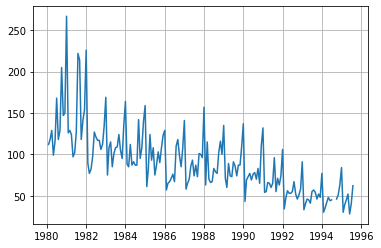

In [12]:
plt.plot(rose2['Time_Stamp'],rose2['Rose']);
plt.grid()

### 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [13]:
rose2.describe()

,Rose
count,185.000000
mean,90.394595
std,39.175344
min,28.000000
25%,63.000000
50%,86.000000
75%,112.000000
max,267.000000


In [14]:
rose1['1989']

YearMonth
1989-01-01     71.0
1989-02-01     60.0
1989-03-01     89.0
1989-04-01     74.0
1989-05-01     73.0
1989-06-01     91.0
1989-07-01     86.0
1989-08-01     74.0
1989-09-01     87.0
1989-10-01     87.0
1989-11-01    109.0
1989-12-01    137.0
Name: Rose, dtype: float64

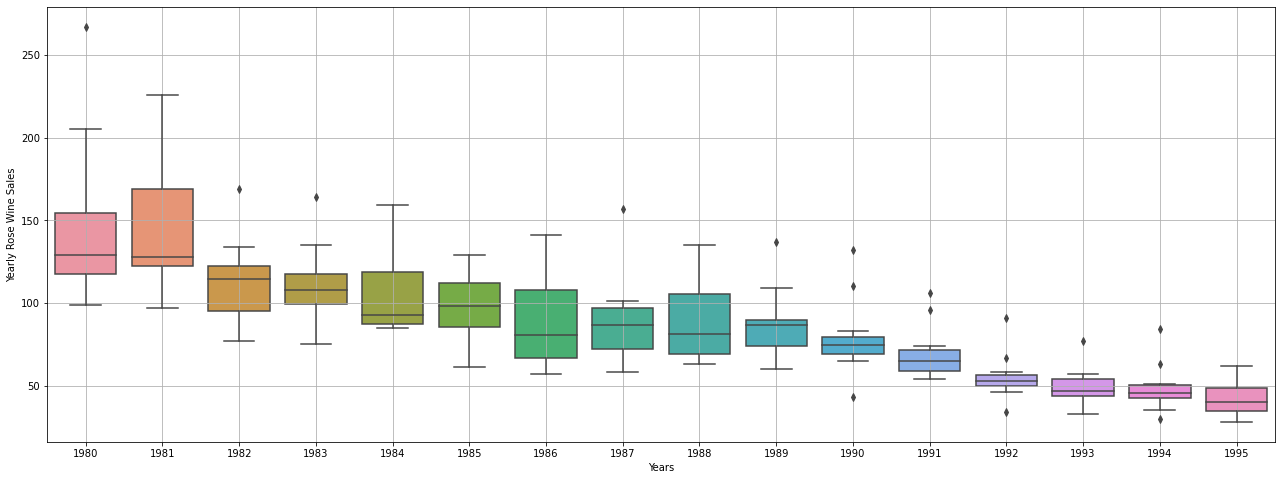

In [15]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(rose1.index.year, rose1, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Rose Wine Sales');

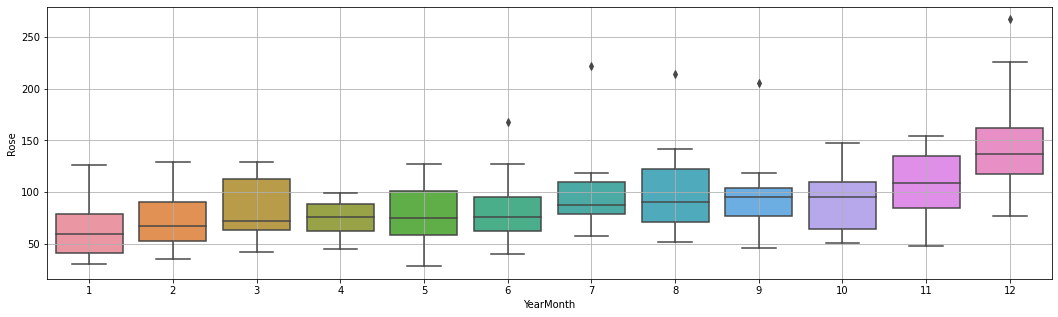

In [16]:
fig, ax = plt.subplots(figsize=(18,5))
sns.boxplot(rose1.index.month, rose1, ax=ax,whis=1.5)
plt.grid();

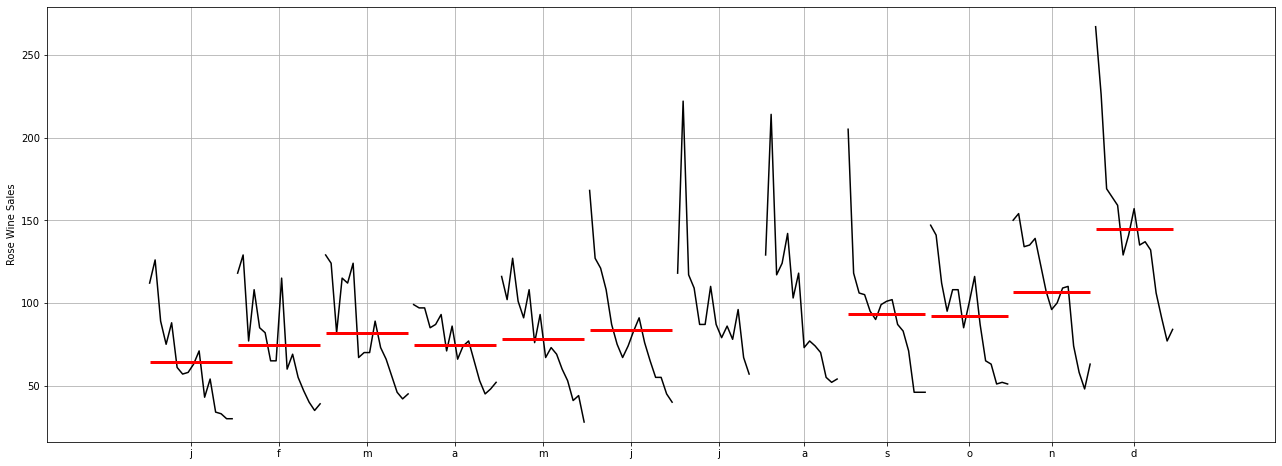

In [17]:
fig, ax = plt.subplots(figsize=(22,8))

month_plot(rose1,ylabel='Rose Wine Sales',ax=ax)
plt.grid();

In [18]:
rose2.set_index(keys = 'Time_Stamp',drop=True,inplace=True)
rose2.head()

,YearMonth,Rose
Time_Stamp,,
1980-01-31,1980-01,112.0
1980-02-29,1980-02,118.0
1980-03-31,1980-03,129.0
1980-04-30,1980-04,99.0
1980-05-31,1980-05,116.0


In [19]:
rose2.drop(labels='YearMonth',inplace=True,axis=1)
rose2.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [20]:
rose2['Rose']

Time_Stamp
1980-01-31    112.0
1980-02-29    118.0
1980-03-31    129.0
1980-04-30     99.0
1980-05-31    116.0
              ...  
1995-03-31     45.0
1995-04-30     52.0
1995-05-31     28.0
1995-06-30     40.0
1995-07-31     62.0
Name: Rose, Length: 187, dtype: float64

In [21]:
yearly_sales_across_months = pd.pivot_table(rose2, values = 'Rose', columns = rose2.index.month, 
                                        index = rose2.index.year)

yearly_sales_across_months

Time_Stamp,1,2,3,4,5,6,7,8,9,10,11,12
Time_Stamp,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.0,129.0,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.0,214.0,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.0,117.0,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.0,124.0,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.0,142.0,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.0,103.0,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.0,118.0,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.0,73.0,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.0,77.0,102.0,116.0,100.0,135.0


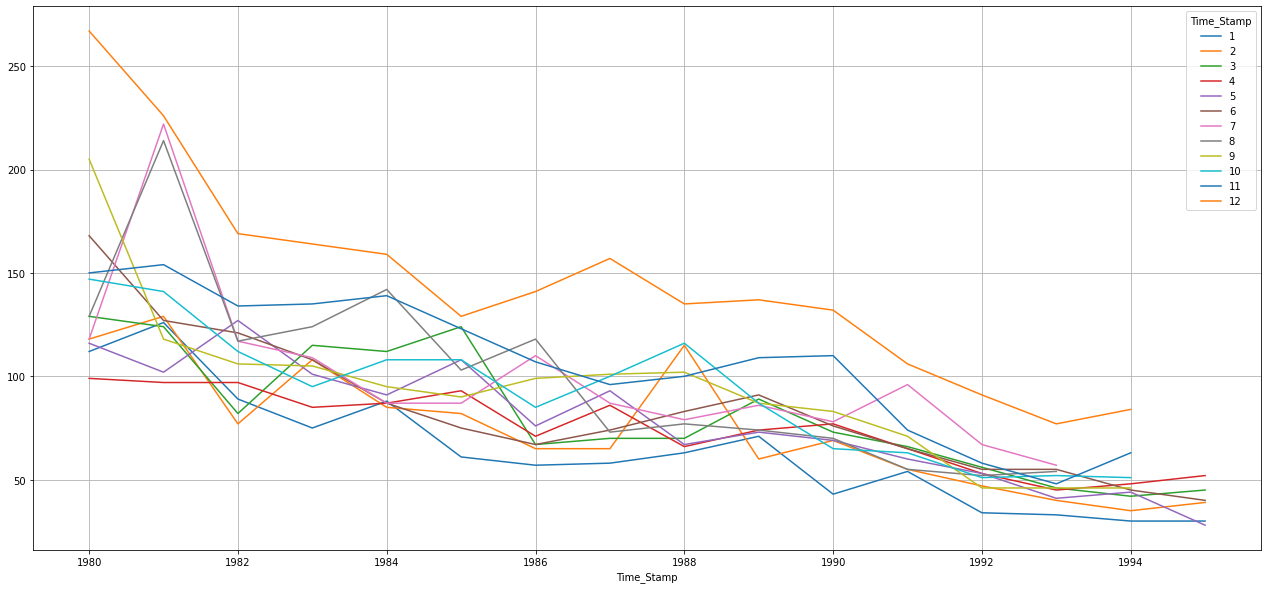

In [22]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months.plot(ax=ax)
plt.grid();

In [23]:
rose_yearly_sum = rose1.resample('A').sum()
rose_yearly_sum.head()

YearMonth
1980-12-31    1758.0
1981-12-31    1780.0
1982-12-31    1348.0
1983-12-31    1324.0
1984-12-31    1280.0
Freq: A-DEC, Name: Rose, dtype: float64

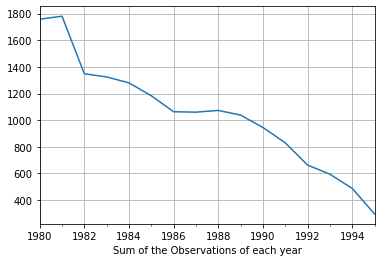

In [24]:
rose_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

In [25]:
rose_yearly_mean = rose1.resample('Y').mean()
rose_yearly_mean.head()

YearMonth
1980-12-31    146.500000
1981-12-31    148.333333
1982-12-31    112.333333
1983-12-31    110.333333
1984-12-31    106.666667
Freq: A-DEC, Name: Rose, dtype: float64

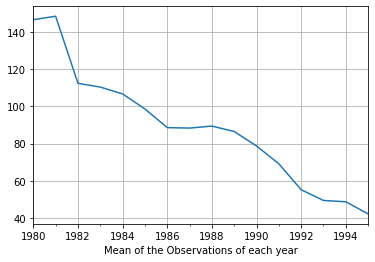

In [26]:
rose_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

In [27]:
rose_quarterly_sum = rose1.resample('Q').sum()
rose_quarterly_sum.head()

YearMonth
1980-03-31    359.0
1980-06-30    383.0
1980-09-30    452.0
1980-12-31    564.0
1981-03-31    379.0
Freq: Q-DEC, Name: Rose, dtype: float64

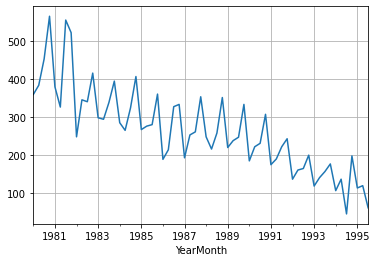

In [28]:
rose_quarterly_sum.plot();
plt.grid()

In [29]:
rose_quarterly_mean = rose1.resample('Q').mean()
rose_quarterly_mean.head()

YearMonth
1980-03-31    119.666667
1980-06-30    127.666667
1980-09-30    150.666667
1980-12-31    188.000000
1981-03-31    126.333333
Freq: Q-DEC, Name: Rose, dtype: float64

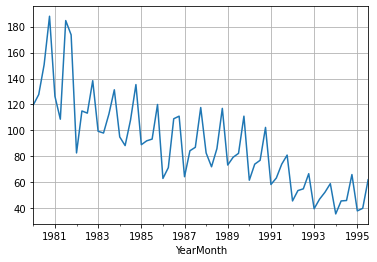

In [30]:
rose_quarterly_mean.plot();
plt.grid()

In [31]:
rose_daily_sum = rose1.resample('D').sum()
rose_daily_sum

YearMonth
1980-01-01    112.0
1980-01-02      0.0
1980-01-03      0.0
1980-01-04      0.0
1980-01-05      0.0
              ...  
1995-06-27      0.0
1995-06-28      0.0
1995-06-29      0.0
1995-06-30      0.0
1995-07-01     62.0
Freq: D, Name: Rose, Length: 5661, dtype: float64

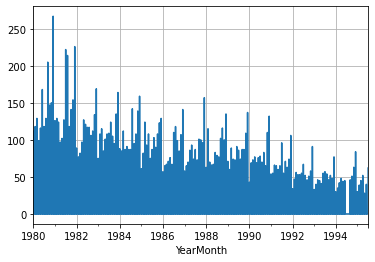

In [32]:
rose_daily_sum.plot()
plt.grid();

In [33]:
rose_decade_sum = rose1.resample('10Y').sum()
rose_decade_sum

YearMonth
1980-12-31     1758.0
1990-12-31    12094.0
2000-12-31     2871.0
Freq: 10A-DEC, Name: Rose, dtype: float64

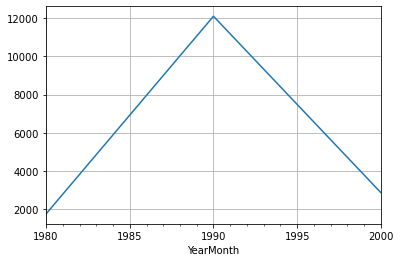

In [34]:
rose_decade_sum.plot();
plt.grid()

In [35]:
rose2.isnull().sum()

Rose    2
dtype: int64

In [36]:
rose2 = rose2.interpolate(limit=2, limit_direction="forward")
print(rose2)

             Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0
...           ...
1995-03-31   45.0
1995-04-30   52.0
1995-05-31   28.0
1995-06-30   40.0
1995-07-31   62.0

[187 rows x 1 columns]


#### Additive Model Decomposition

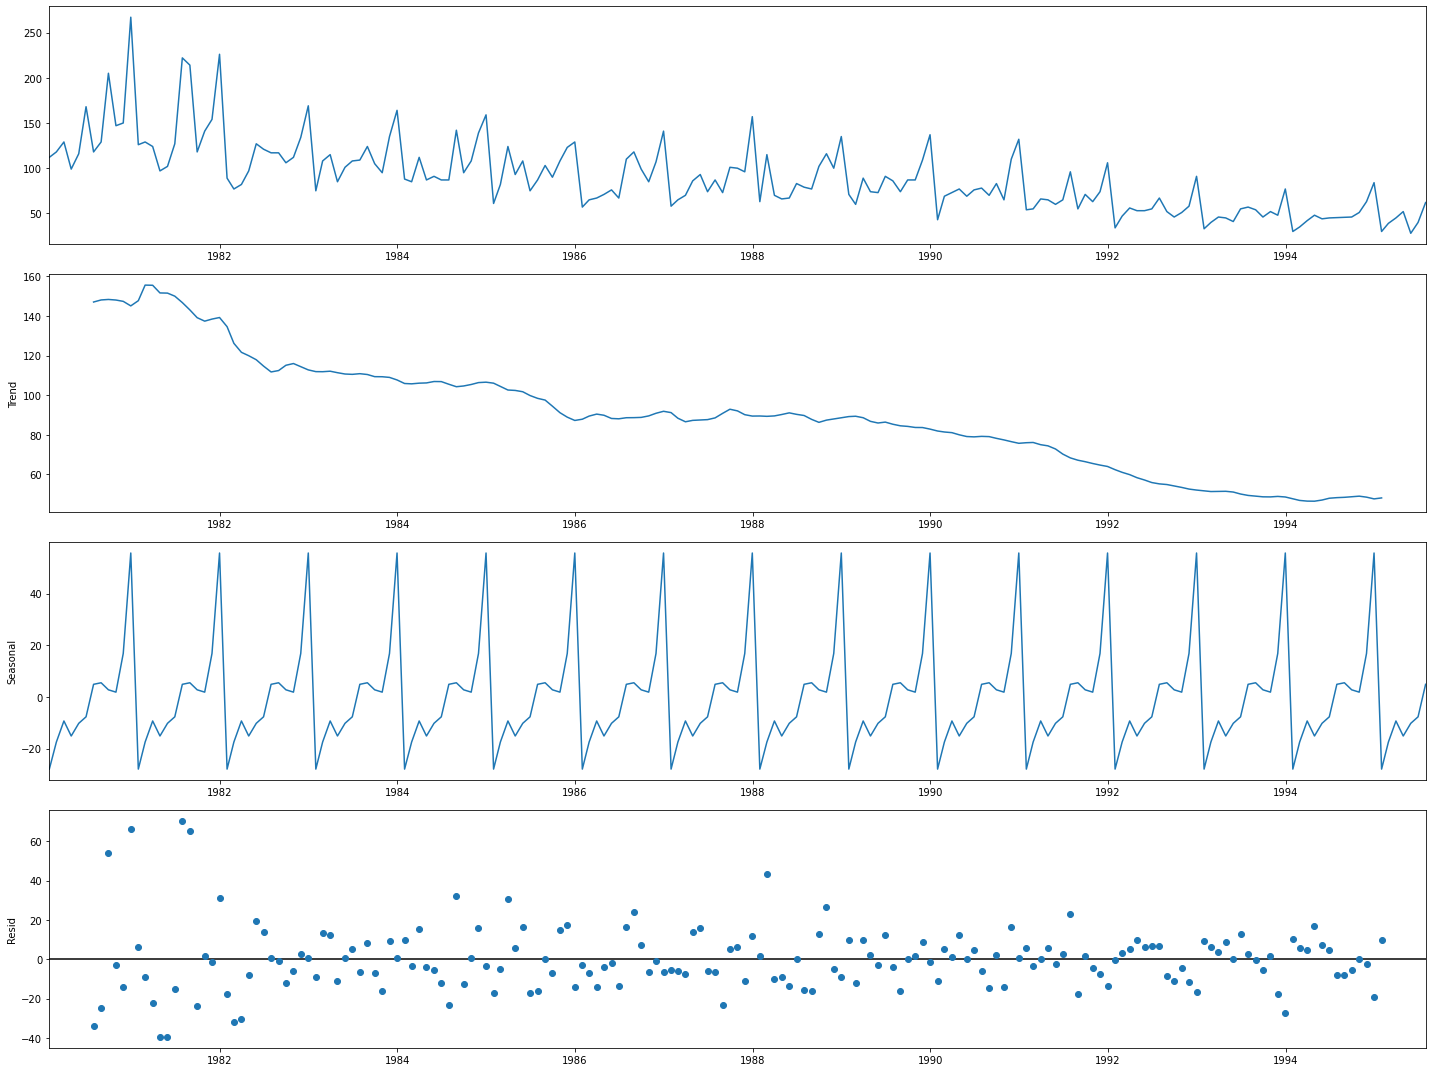

In [37]:
rcParams['figure.figsize'] = 20,15
decomposition = seasonal_decompose(rose2,model='additive')
decomposition.plot();

In [38]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [39]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31   -27.908647
1980-02-29   -17.435632
1980-03-31    -9.285830
1980-04-30   -15.098330
1980-05-31   -10.196544
1980-06-30    -7.678687
1980-07-31     4.896908
1980-08-31     5.499686
1980-09-30     2.774686
1980-10-31     1.871908
1980-11-30    16.846908
1980-12-31    55.713575
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -33.980241
1980-08-31   -24.624686
1980-09-30    53.850314
1980-10-31    -2.955241
1980-11-30   -14.263575
1980-12-31    66.16

In [40]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(12)

Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    113.103092
1980-08-31    123.500314
1980-09-30    202.225314
1980-10-31    145.128092
1980-11-30    133.153092
1980-12-31    211.286425
dtype: float64

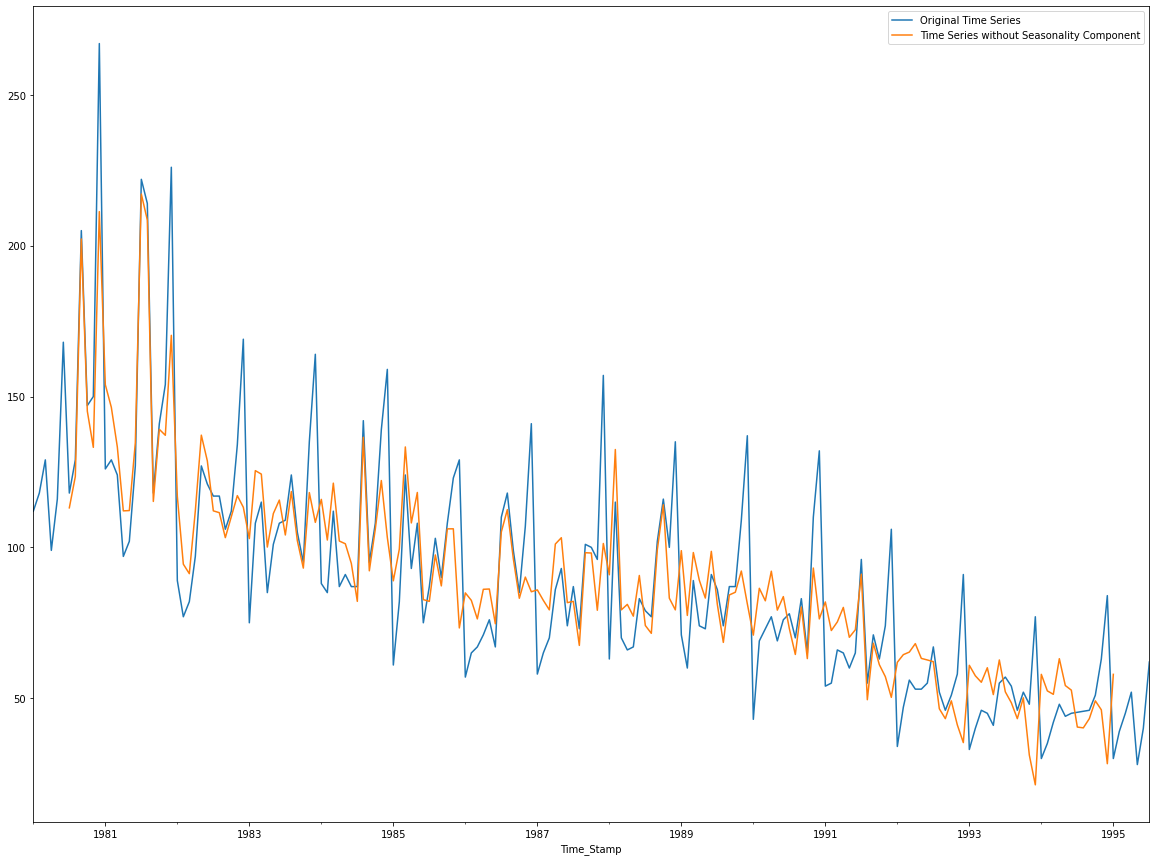

In [41]:
rose2.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

### 3. Split the data into training and test. The test data should start in 1991.

In [42]:
train=rose2[rose2.index.year < 1991]
test=rose2[rose2.index.year >= 1991]

In [43]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [44]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
              Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0 

Last few rows of Training Data 
              Rose
Time_Stamp       
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0 

First few rows of Test Data 
             Rose
Time_Stamp      
1991-01-31  54.0
1991-02-28  55.0
1991-03-31  66.0
1991-04-30  65.0
1991-05-31  60.0 

Last few rows of Test Data 
             Rose
Time_Stamp      
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0 



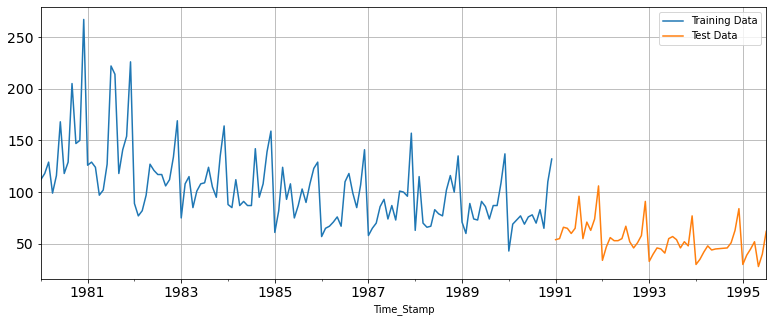

In [45]:
train['Rose'].plot(figsize=(13,5), fontsize=14)
test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

### 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.

#### Regression Model

In [46]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [47]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [48]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
Time_Stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  time
Time_Stamp             
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  time
Time_Stamp            
1991-01-31  54.0   133
1991-02-28  55.0   134
1991-03-31  66.0   135
1991-04-30  65.0   136
1991-05-31  60.0   137 

Last few rows of Test Data 
             Rose  time
Time_Stamp            
1995-03-31  45.0   183
1995-04-30  52.0   184
1995-05-31  28.0   185
1995-06-30  40.0   186
1995-07-31  62.0   187 



In [49]:
lr = LinearRegression()

In [50]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

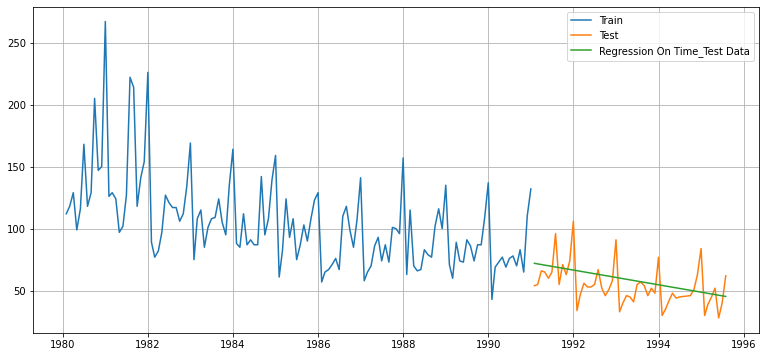

In [51]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [52]:
rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.269


In [53]:
results = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
results

,Test RMSE
RegressionOnTime,15.268955


#### Naive Model

In [54]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [55]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

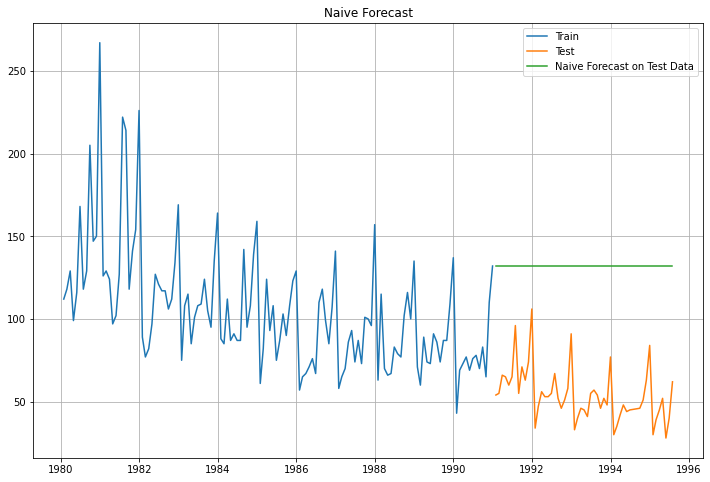

In [56]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [57]:
rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 79.719


In [58]:
resultsDF2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

results = pd.concat([results, resultsDF2])
results

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773


#### Simple Average Model

In [59]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [60]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
Time_Stamp,,
1991-01-31,54.0,104.939394
1991-02-28,55.0,104.939394
1991-03-31,66.0,104.939394
1991-04-30,65.0,104.939394
1991-05-31,60.0,104.939394


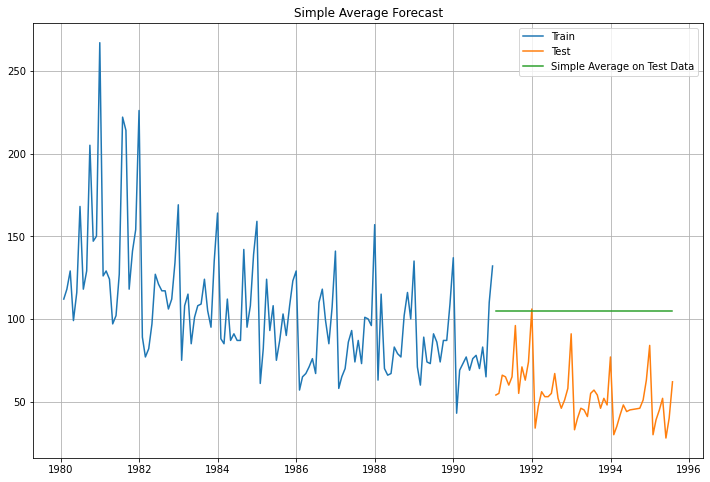

In [61]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [62]:
rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.461


In [63]:
resultsDF3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

results = pd.concat([results, resultsDF3])
results

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570


#### Moving Average Model

In [64]:
MovingAverage = rose2.copy()
MovingAverage.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [65]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1980-01-31,112.0,NaN,NaN,NaN,NaN
1980-02-29,118.0,115.0,NaN,NaN,NaN
1980-03-31,129.0,123.5,NaN,NaN,NaN
1980-04-30,99.0,114.0,114.5,NaN,NaN
1980-05-31,116.0,107.5,115.5,NaN,NaN


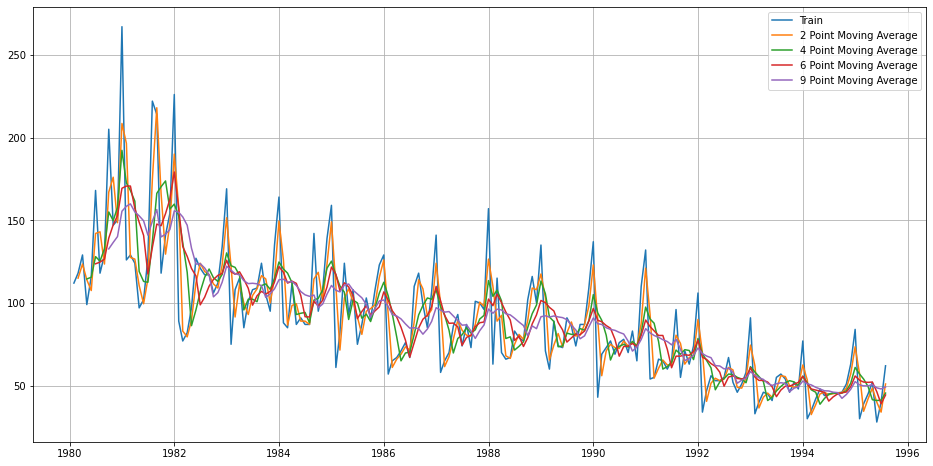

In [66]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [67]:
trailing_MovingAverage_train=MovingAverage[rose2.index.year < 1991]
trailing_MovingAverage_test=MovingAverage[rose2.index.year >= 1991]

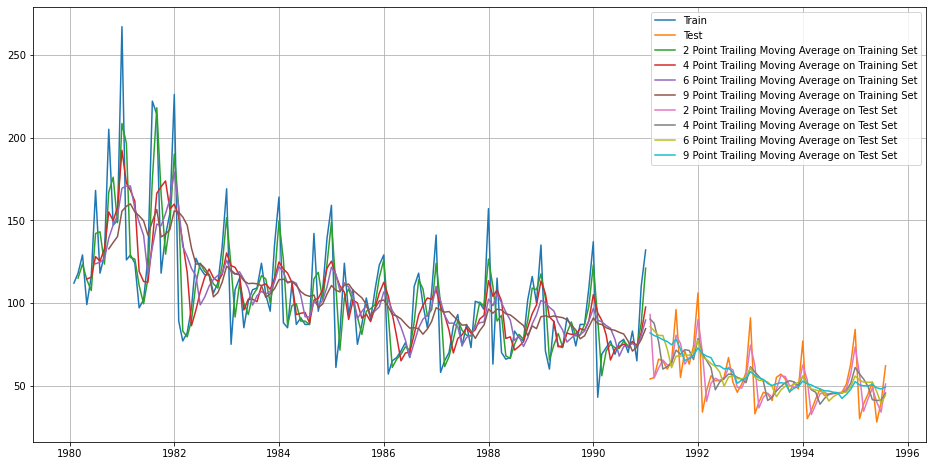

In [68]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [69]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.451
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.566
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.728 


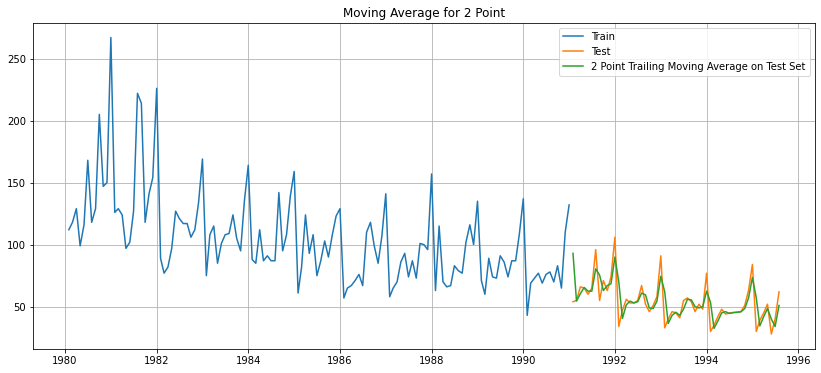

In [70]:
plt.figure(figsize=(14,6))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.legend(loc='best')
plt.title("Moving Average for 2 Point")
plt.grid();

In [71]:
resultsDF4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

results = pd.concat([results, resultsDF4])
results

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630


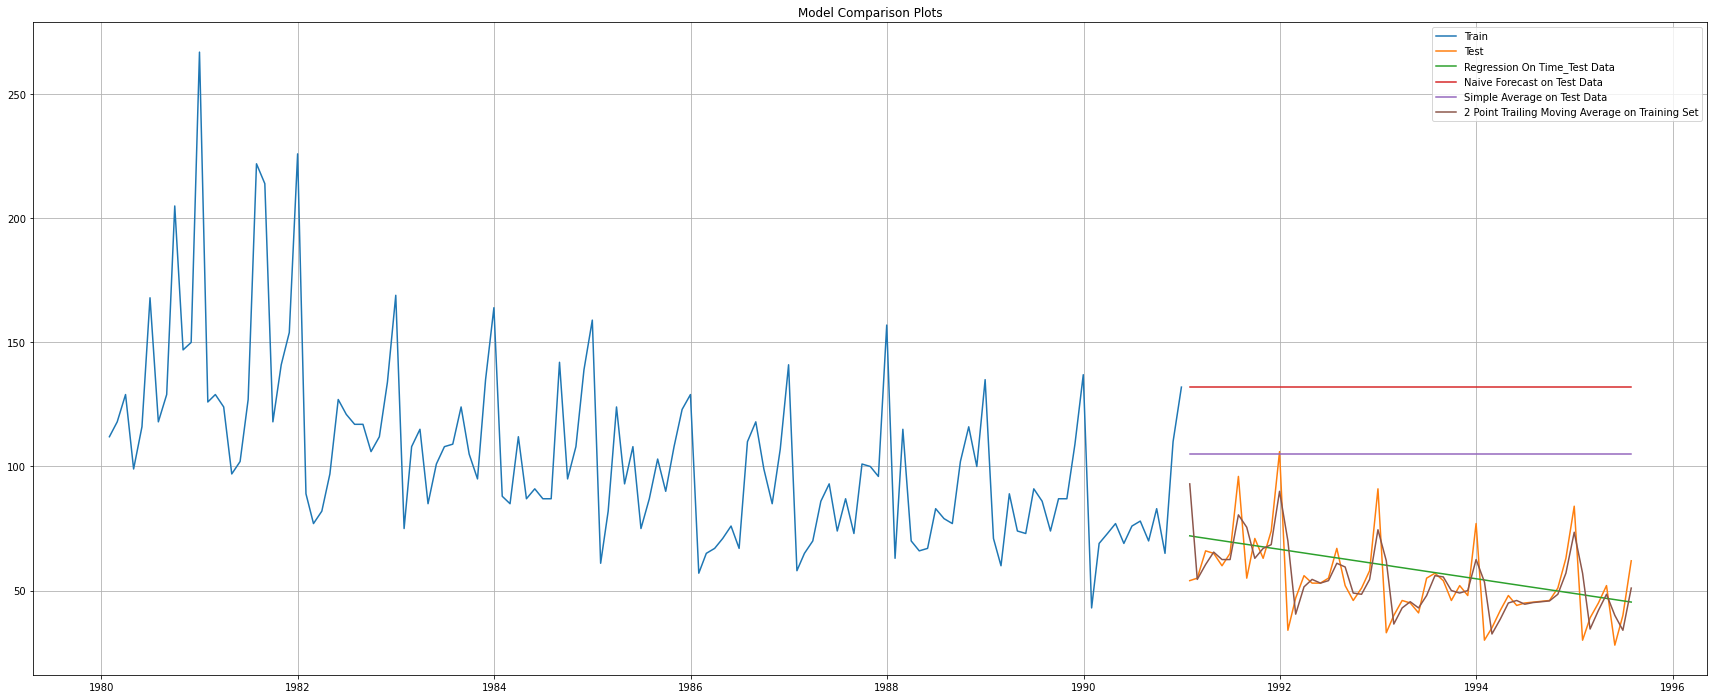

In [72]:
plt.figure(figsize=(30,12))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

#### Simple Exponential Smoothing

In [73]:
SES_train = train.copy()
SES_test = test.copy()

In [74]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

In [75]:
model_SES_autofit = model_SES.fit(optimized=True)

In [76]:
model_SES_autofit.params

{'smoothing_level': 0.0987493111726833,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38720226208358,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [77]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Rose,predict
Time_Stamp,,
1991-01-31,54.0,87.104983
1991-02-28,55.0,87.104983
1991-03-31,66.0,87.104983
1991-04-30,65.0,87.104983
1991-05-31,60.0,87.104983


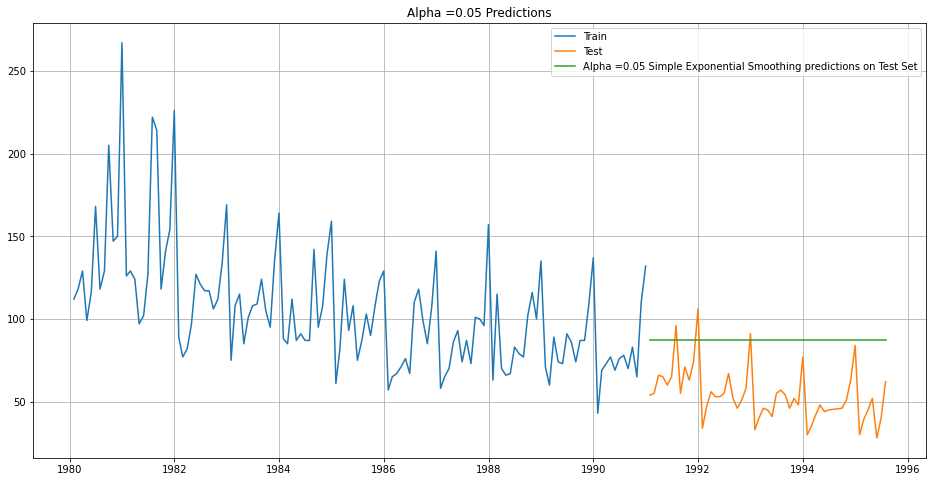

In [78]:
plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.05 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.05 Predictions');

In [79]:
rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.05 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.05 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.796


In [80]:
resultsDF5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.05,SimpleExponentialSmoothing'])

results = pd.concat([results, resultsDF5])
results

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
"Alpha=0.05,SimpleExponentialSmoothing",36.796227


#### Double Exponential Smoothing

In [81]:
DES_train = train.copy()
DES_test = test.copy()

In [82]:
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 1.4901161193847656e-08, 'smoothing_trend': 1.6610391146660035e-10, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 137.81553690867275, 'initial_trend': -0.4943781897068274, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [83]:
DES_test['predict'] =  model_DES.forecast(len(test))
DES_test['predict'].head()

Time_Stamp
1991-01-31    72.063238
1991-02-28    71.568859
1991-03-31    71.074481
1991-04-30    70.580103
1991-05-31    70.085725
Name: predict, dtype: float64

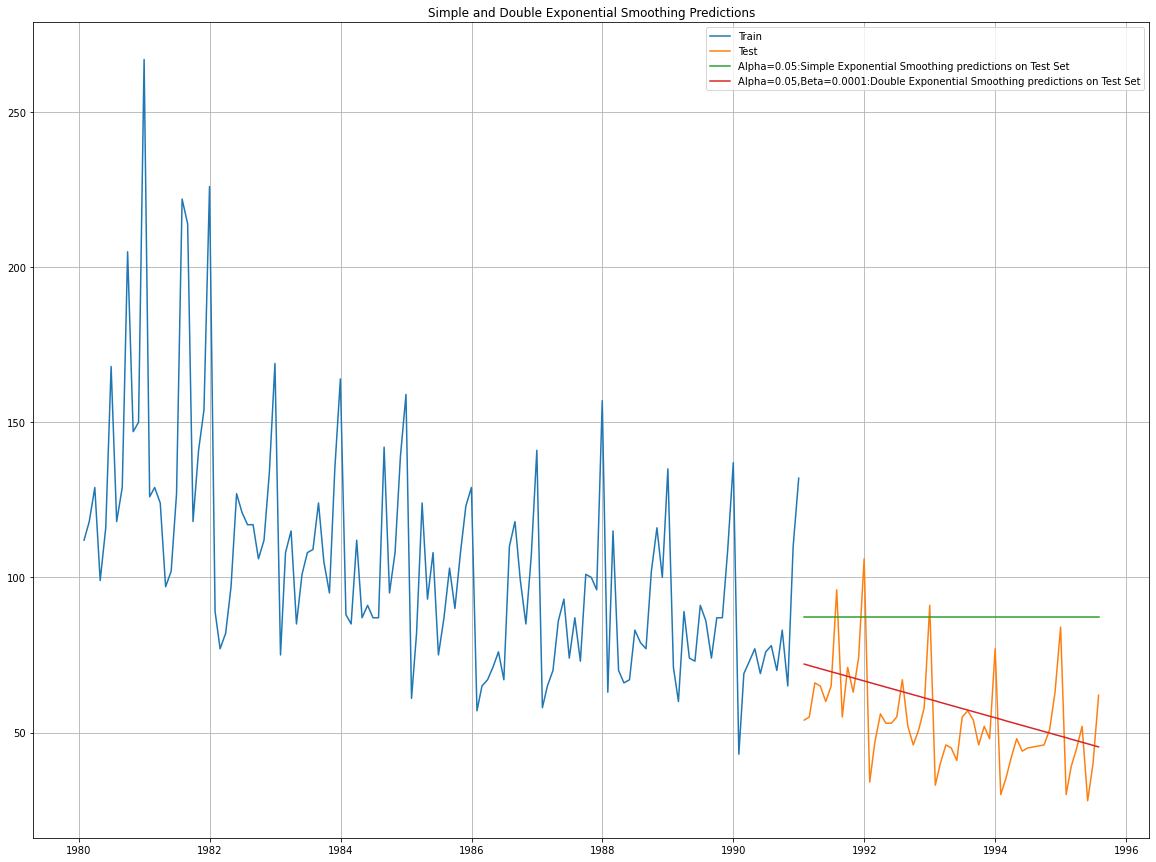

In [84]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_test['predict'], label='Alpha=0.05:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_test['predict'], label='Alpha=0.05,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [85]:
rmse_model6_test_1 = metrics.mean_squared_error(SES_test['Rose'],DES_test['predict'],squared=False)
print("For Alpha =0.05 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha =0.05 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 15.269


In [86]:
resultsDF6 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]},index=['Alpha=0.05,DoubleExponentialSmoothing'])

results = pd.concat([results, resultsDF6])
results

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
"Alpha=0.05,SimpleExponentialSmoothing",36.796227
"Alpha=0.05,DoubleExponentialSmoothing",15.268944


#### Triple Exponential Smoothing

In [87]:
TES_train = train.copy()
TES_test = test.copy()

In [88]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative',freq='M')

In [89]:
model_TES_autofit = model_TES.fit()

In [90]:
model_TES_autofit.params

{'smoothing_level': 0.06569374607191865,
 'smoothing_trend': 0.05192938504457338,
 'smoothing_seasonal': 3.879136202038614e-06,
 'damping_trend': nan,
 'initial_level': 54.10985491750761,
 'initial_trend': -0.33471965714896845,
 'initial_seasons': array([2.08282313, 2.36326666, 2.58210206, 2.25702695, 2.53757493,
        2.76639991, 3.04101803, 3.23434567, 3.06747277, 3.00164124,
        3.49893806, 4.82552476]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [91]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,Rose,auto_predict
Time_Stamp,,
1991-01-31,54.0,56.689174
1991-02-28,55.0,64.129166
1991-03-31,66.0,69.856436
1991-04-30,65.0,60.877474
1991-05-31,60.0,68.237072


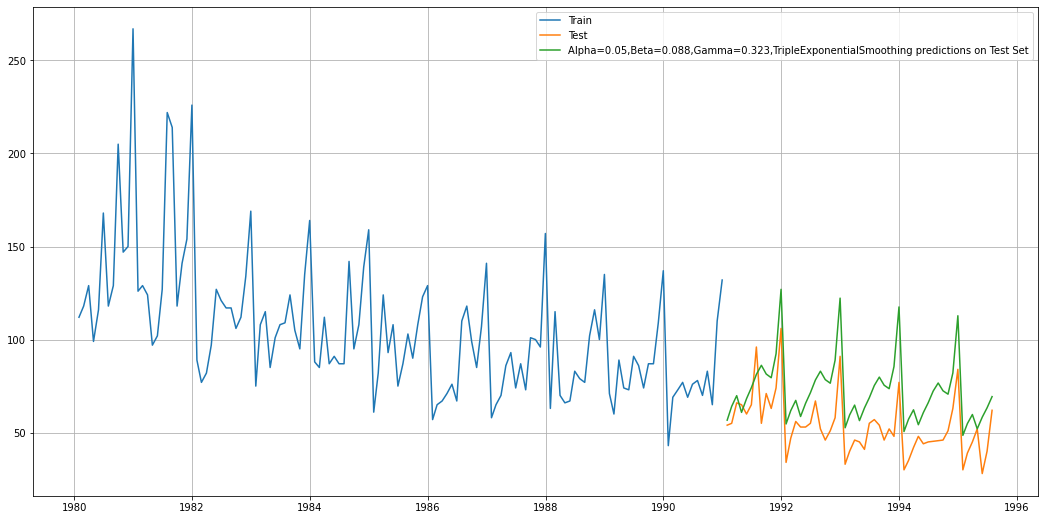

In [92]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.05,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [93]:
rmse_model7_test_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.05,Beta=0.088,Gamma=0.323, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model7_test_1))

For Alpha=0.05,Beta=0.088,Gamma=0.323, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 21.020


In [94]:
resultsDF8 = pd.DataFrame({'Test RMSE': [rmse_model7_test_1]}
                           ,index=['Alpha=0.05,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing'])

results = pd.concat([results, resultsDF8])
results

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
"Alpha=0.05,SimpleExponentialSmoothing",36.796227
"Alpha=0.05,DoubleExponentialSmoothing",15.268944
"Alpha=0.05,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",21.019620


In [95]:
resultsDF7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDF7

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [96]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(TES_test['Rose']))
        
            rmse_model7_1_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model7_1_1_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
            
            resultsDF7 = resultsDF7.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_1_train,'Test RMSE':rmse_model7_1_1_test}
                                                 , ignore_index=True)

In [97]:
resultsDF7

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
0,0.3,0.3,0.3,27.217969,19.057218
1,0.3,0.3,0.4,27.399095,11.201633
2,0.3,0.3,0.5,27.928512,30.565763
3,0.3,0.3,0.6,28.888611,63.623019
4,0.3,0.3,0.7,30.568635,122.472557
...,...,...,...,...,...
507,1.0,1.0,0.6,28358.458519,9603.635095
508,1.0,1.0,0.7,30724.126331,23029.955361
509,1.0,1.0,0.8,1218.755446,9626.710854
510,1.0,1.0,0.9,14150.253251,9691.905402


In [98]:
resultsDF7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
8,0.3,0.4,0.3,28.111886,10.945435
1,0.3,0.3,0.4,27.399095,11.201633
69,0.4,0.3,0.8,32.601491,12.615607
16,0.3,0.5,0.3,29.087520,14.414604
131,0.5,0.3,0.6,32.144773,16.720720


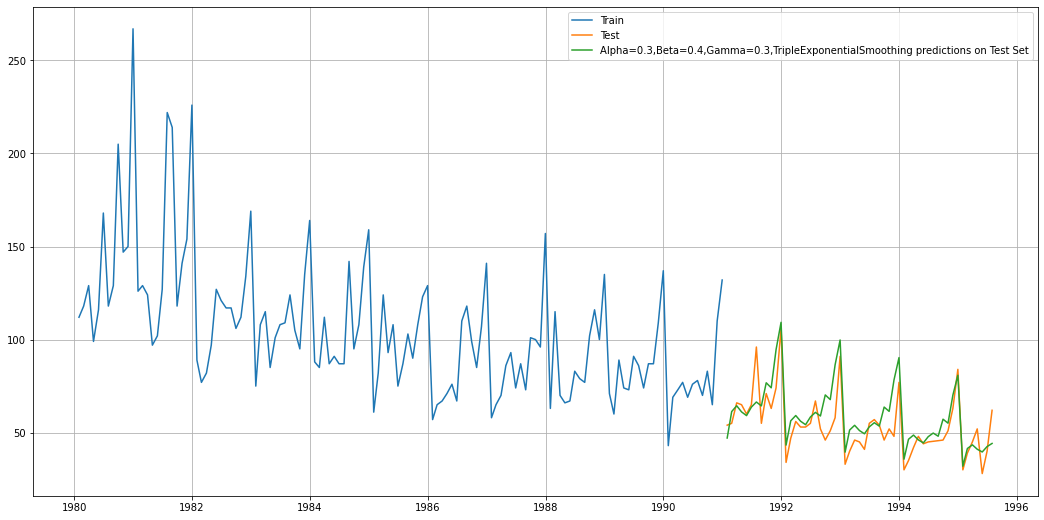

In [99]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.3, 0.4, 0.3], label='Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [100]:
rmse_model7_test_1_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict', 0.3, 0.4, 0.3],squared=False)
rmse_model7_test_1_1

10.945435096595471

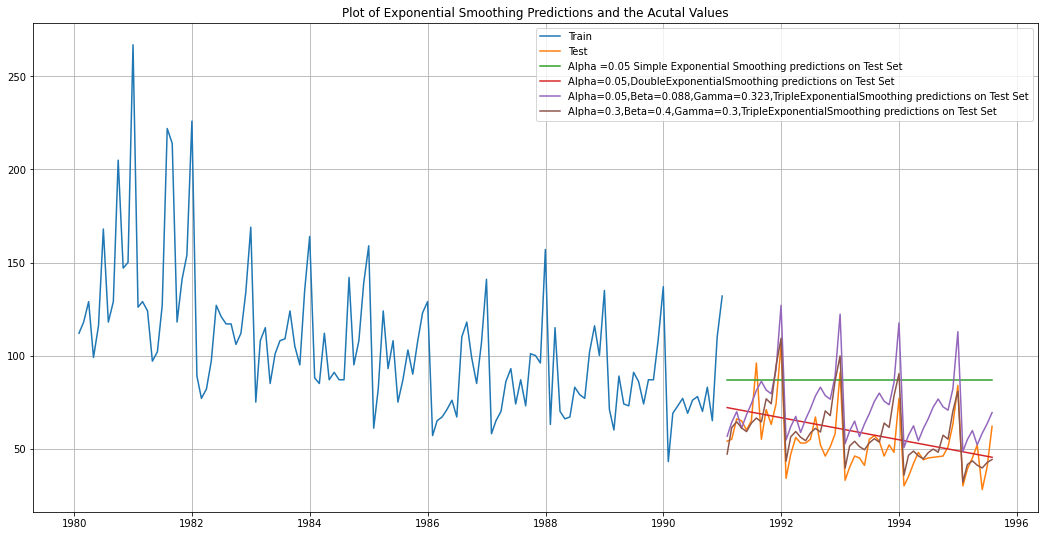

In [101]:
plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.05 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict'], label='Alpha=0.05,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['auto_predict'], label='Alpha=0.05,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['predict', 0.3, 0.4, 0.3], label='Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

In [102]:
resultsDF7 = pd.DataFrame({'Test RMSE': rmse_model7_test_1_1}
                           ,index=['Alpha=0.03,Beta=0.04,Gamma=0.3,TripleExponentialSmoothing'])

results = pd.concat([results, resultsDF7])
results

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
"Alpha=0.05,SimpleExponentialSmoothing",36.796227
"Alpha=0.05,DoubleExponentialSmoothing",15.268944
"Alpha=0.05,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",21.019620


### 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [103]:
dftest = adfuller(rose2,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.240
DF test p-value is 0.46713716277931433
Number of lags used 13


In [104]:
dftest = adfuller(rose2.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -8.162
DF test p-value is 3.015976115828316e-11
Number of lags used 12


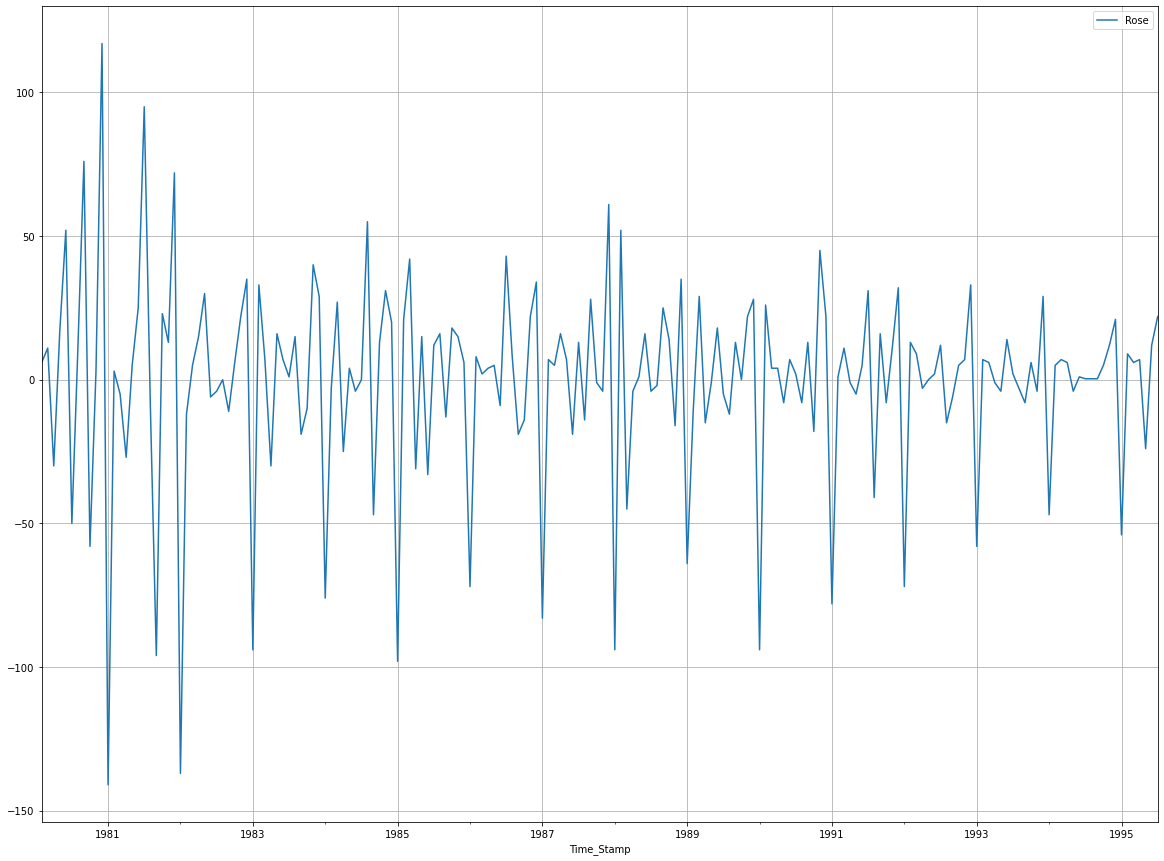

In [105]:
rose2.diff().dropna().plot(grid=True);

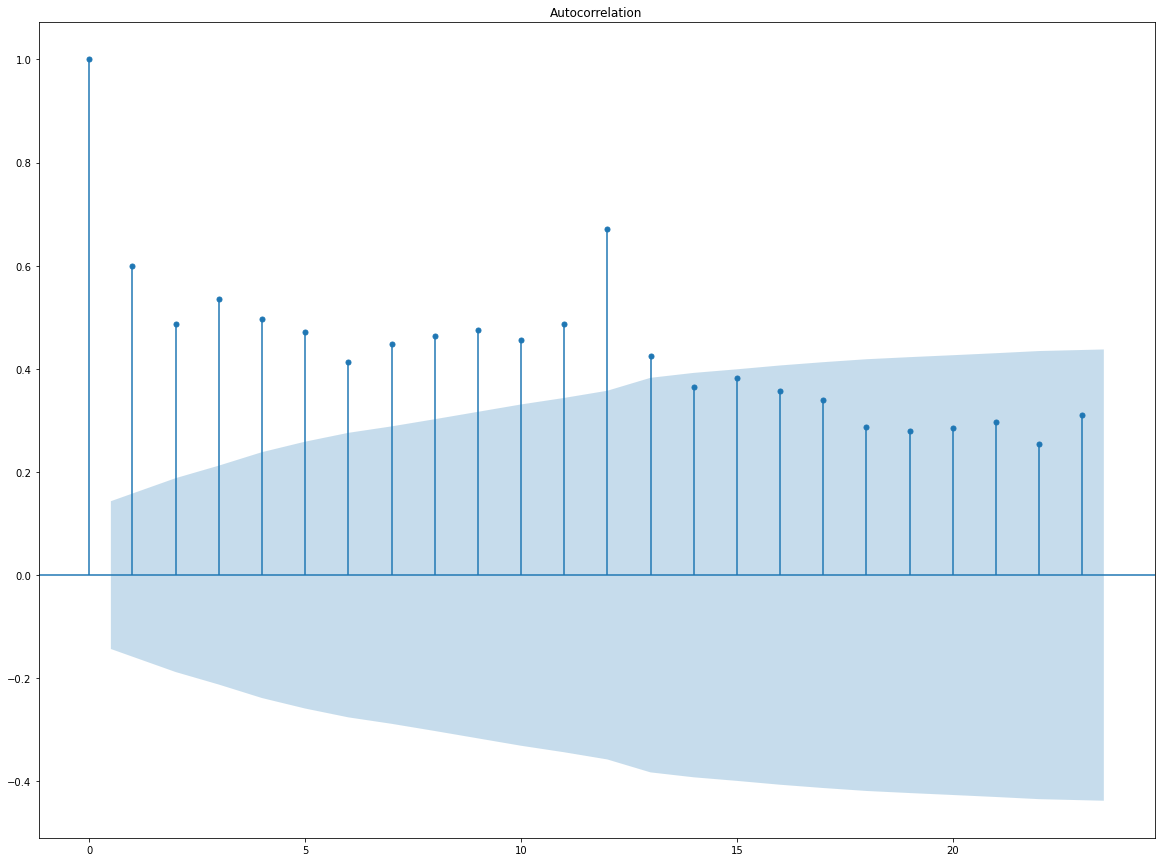

In [106]:
plot_acf(rose2,alpha=0.05);

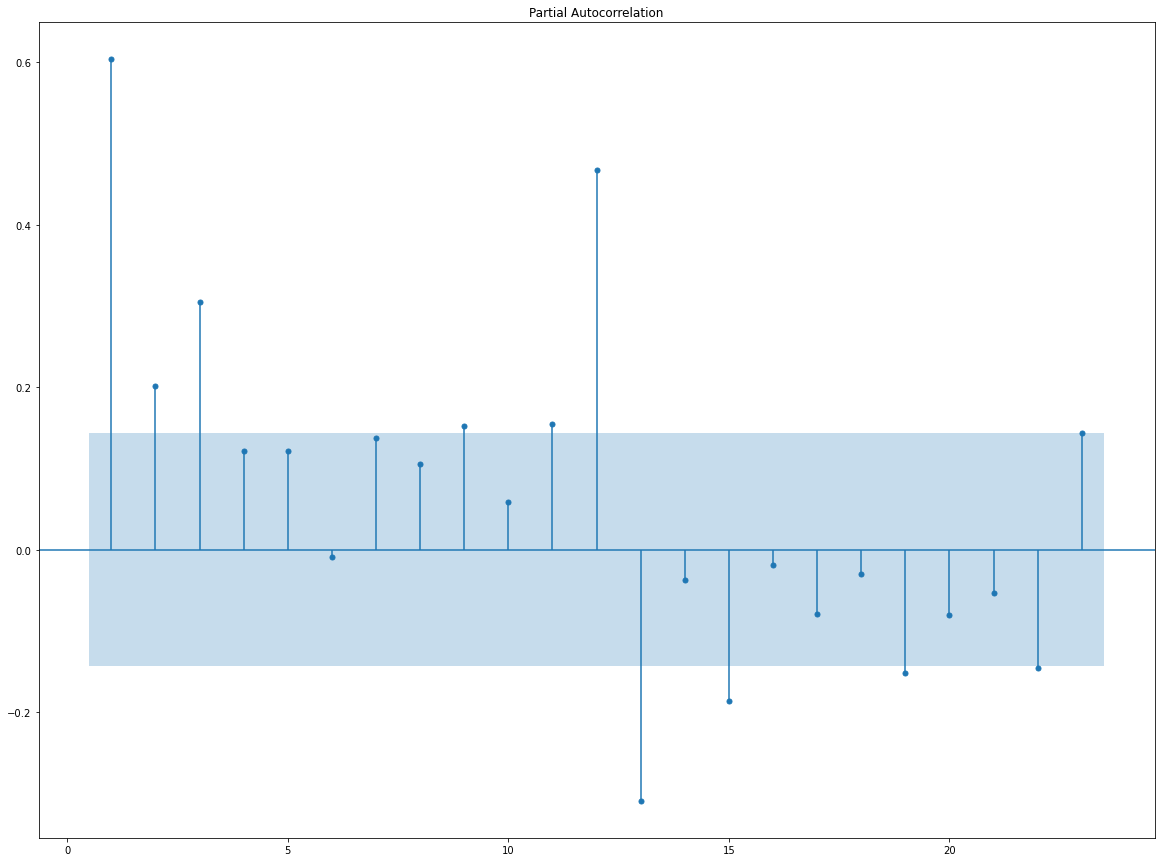

In [107]:
plot_pacf(rose2,zero=False,alpha=0.05);

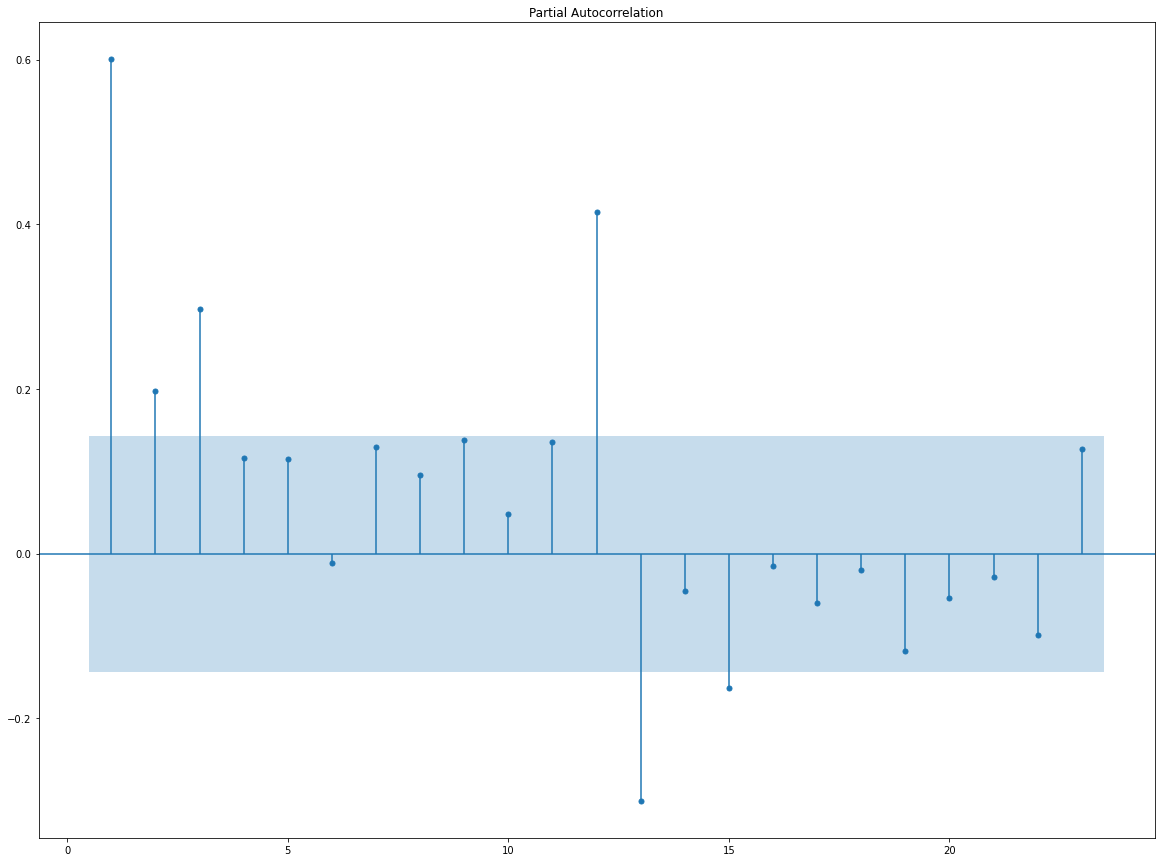

In [108]:
plot_pacf(rose2,zero=False,alpha=0.05,method='ywmle');

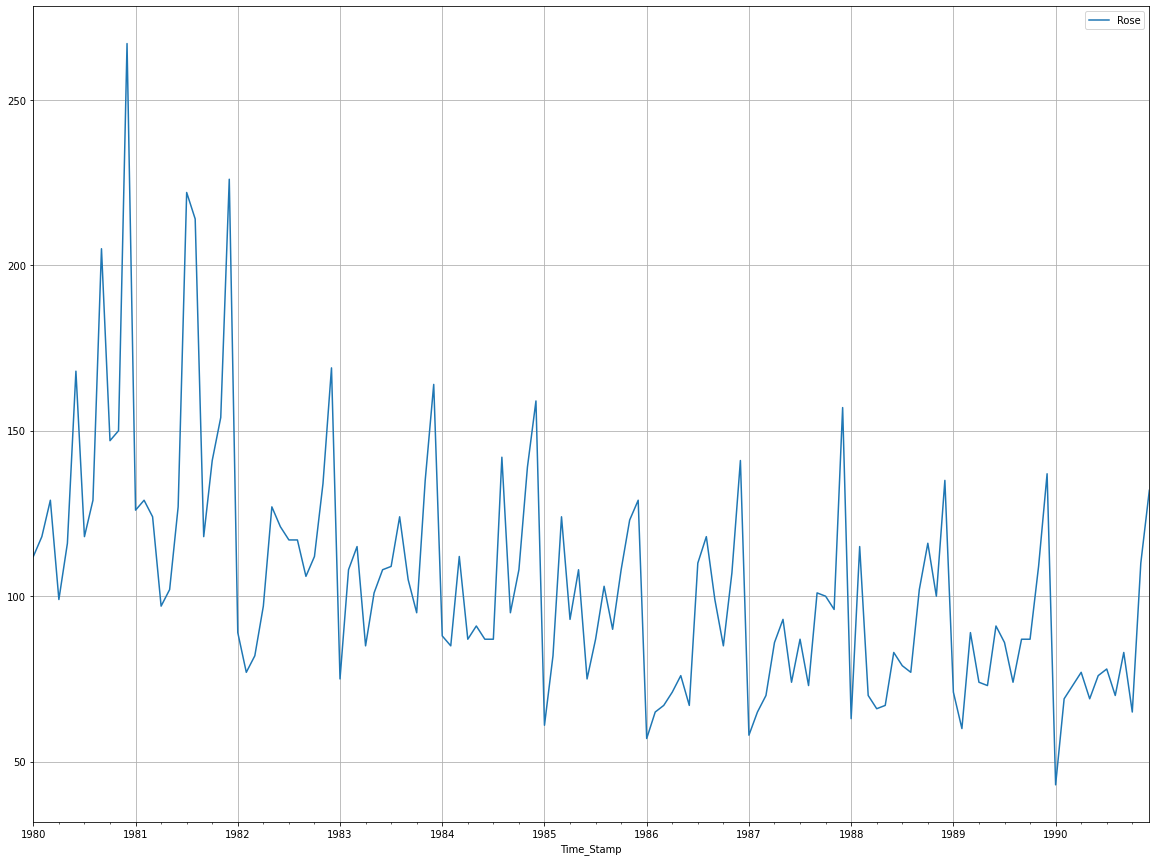

In [109]:
train.plot(grid=True);

In [110]:
dftest = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.686
DF test p-value is 0.7569093051047064
Number of lags used 13


In [111]:
dftest = adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -6.804
DF test p-value is 3.894831356782412e-08
Number of lags used 12


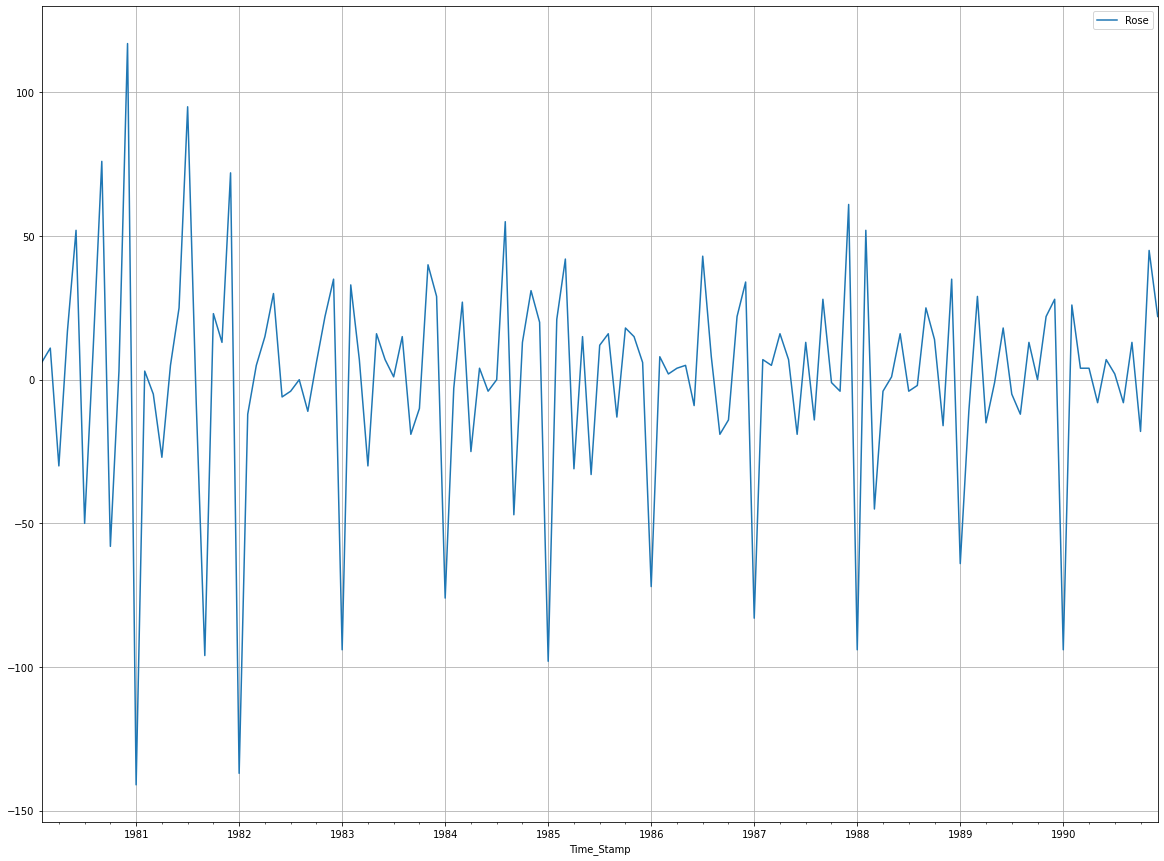

In [112]:
train.diff().dropna().plot(grid=True);

In [113]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


### 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

### and

### 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

In [114]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [115]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [116]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748312
ARIMA(0, 1, 2) - AIC:1279.6715288535806
ARIMA(0, 1, 3) - AIC:1280.5453761734655
ARIMA(1, 1, 0) - AIC:1317.3503105381492
ARIMA(1, 1, 1) - AIC:1280.5742295380064
ARIMA(1, 1, 2) - AIC:1279.8707234231922
ARIMA(1, 1, 3) - AIC:1281.8707223309998
ARIMA(2, 1, 0) - AIC:1298.6110341605004
ARIMA(2, 1, 1) - AIC:1281.5078621868543
ARIMA(2, 1, 2) - AIC:1281.8707222264356
ARIMA(2, 1, 3) - AIC:1274.6954123405285
ARIMA(3, 1, 0) - AIC:1297.4810917271739
ARIMA(3, 1, 1) - AIC:1282.4192776271989
ARIMA(3, 1, 2) - AIC:1283.720740597716
ARIMA(3, 1, 3) - AIC:1278.6679167115944


In [117]:
ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
11,"(2, 1, 3)",1274.695412
15,"(3, 1, 3)",1278.667917
2,"(0, 1, 2)",1279.671529
6,"(1, 1, 2)",1279.870723
3,"(0, 1, 3)",1280.545376


In [118]:
auto_ARIMA = ARIMA(train, order=(2,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Sun, 09 Oct 2022   AIC                           1274.695
Time:                        15:07:09   BIC                           1291.947
Sample:                    01-31-1980   HQIC                          1281.705
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6783      0.084    -19.999      0.000      -1.843      -1.514
ar.L2         -0.7291      0.084     -8.687      0.000      -0.894      -0.565
ma.L1          1.0446      0.618      1.691      0.0

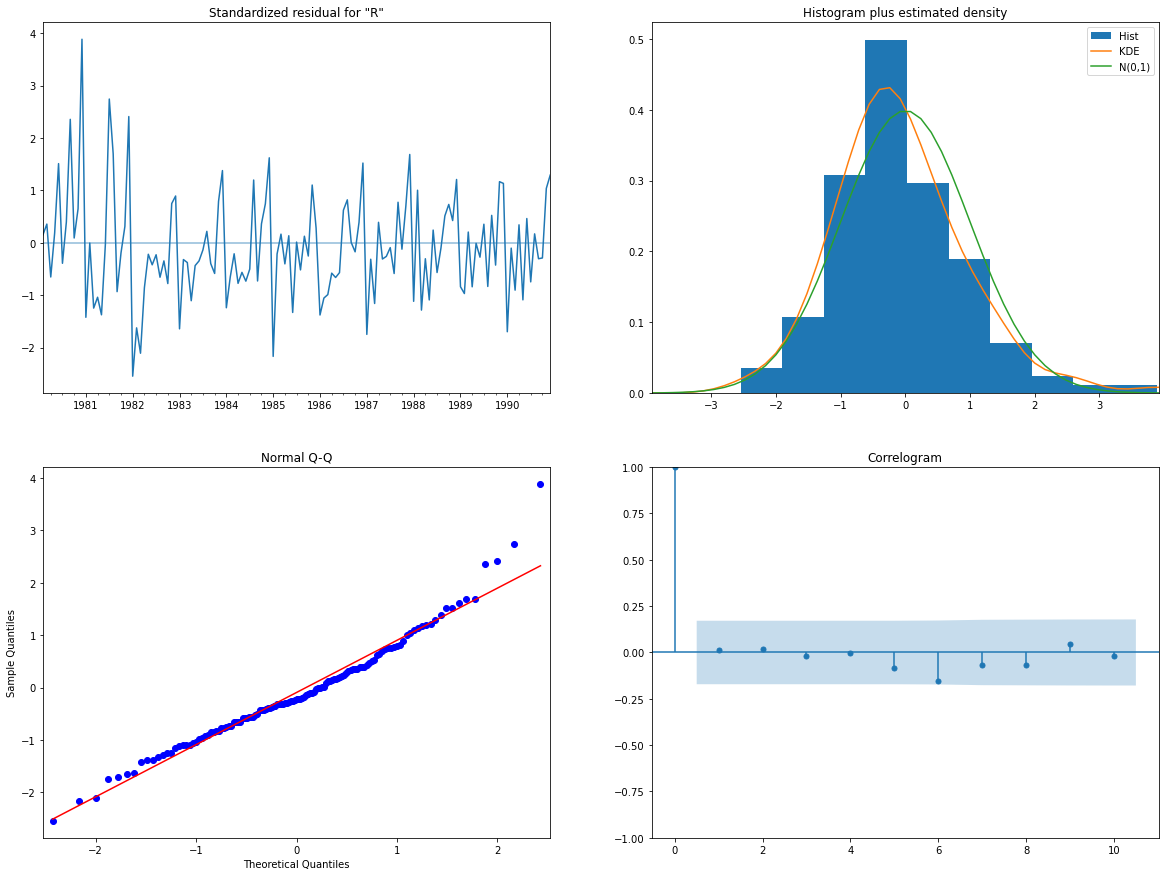

In [119]:
results_auto_ARIMA.plot_diagnostics();

In [120]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [121]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [122]:
rmse_model8 = mean_squared_error(test['Rose'],predicted_auto_ARIMA,squared=False)
rmse_model8

36.812983948773486

In [123]:
resultsDF9 = pd.DataFrame({'Test RMSE': [rmse_model8]}
                           ,index=['ARIMA(2,1,3)'])

results = pd.concat([results, resultsDF9])
results

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
"Alpha=0.05,SimpleExponentialSmoothing",36.796227
"Alpha=0.05,DoubleExponentialSmoothing",15.268944
"Alpha=0.05,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",21.019620


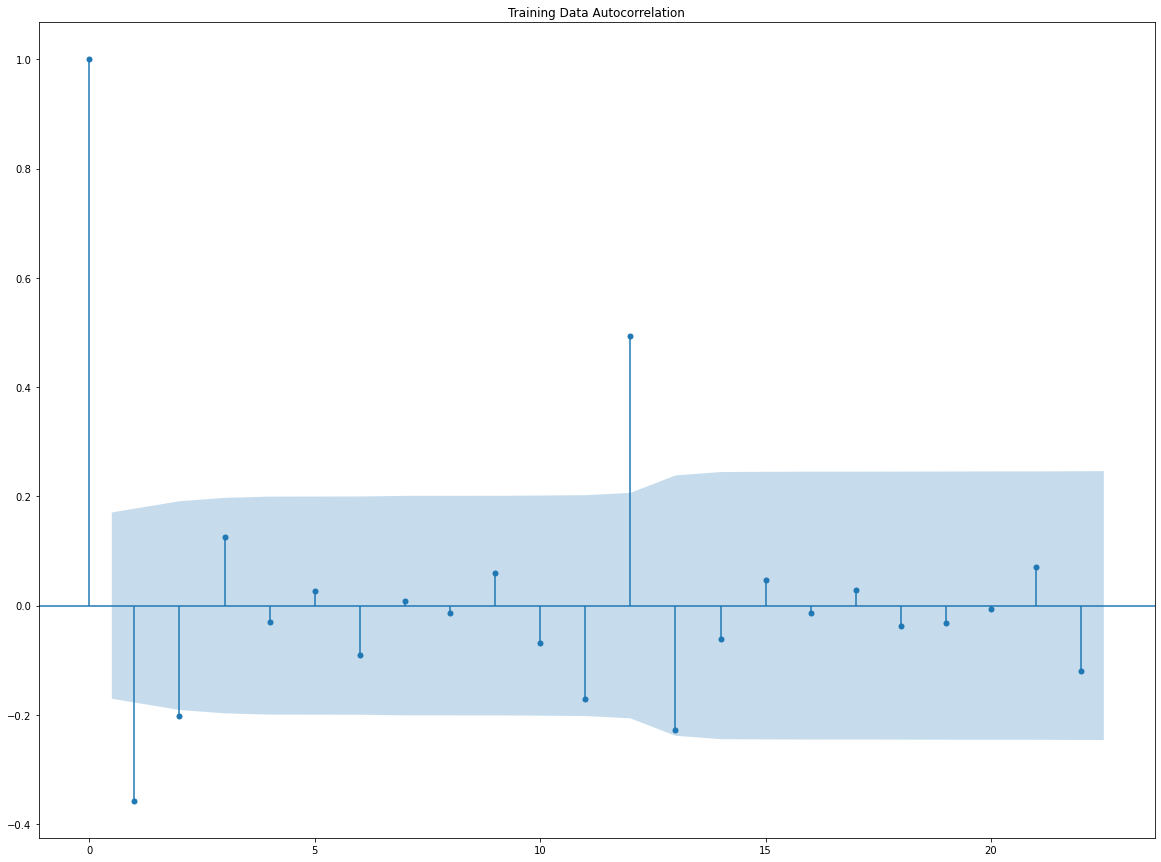

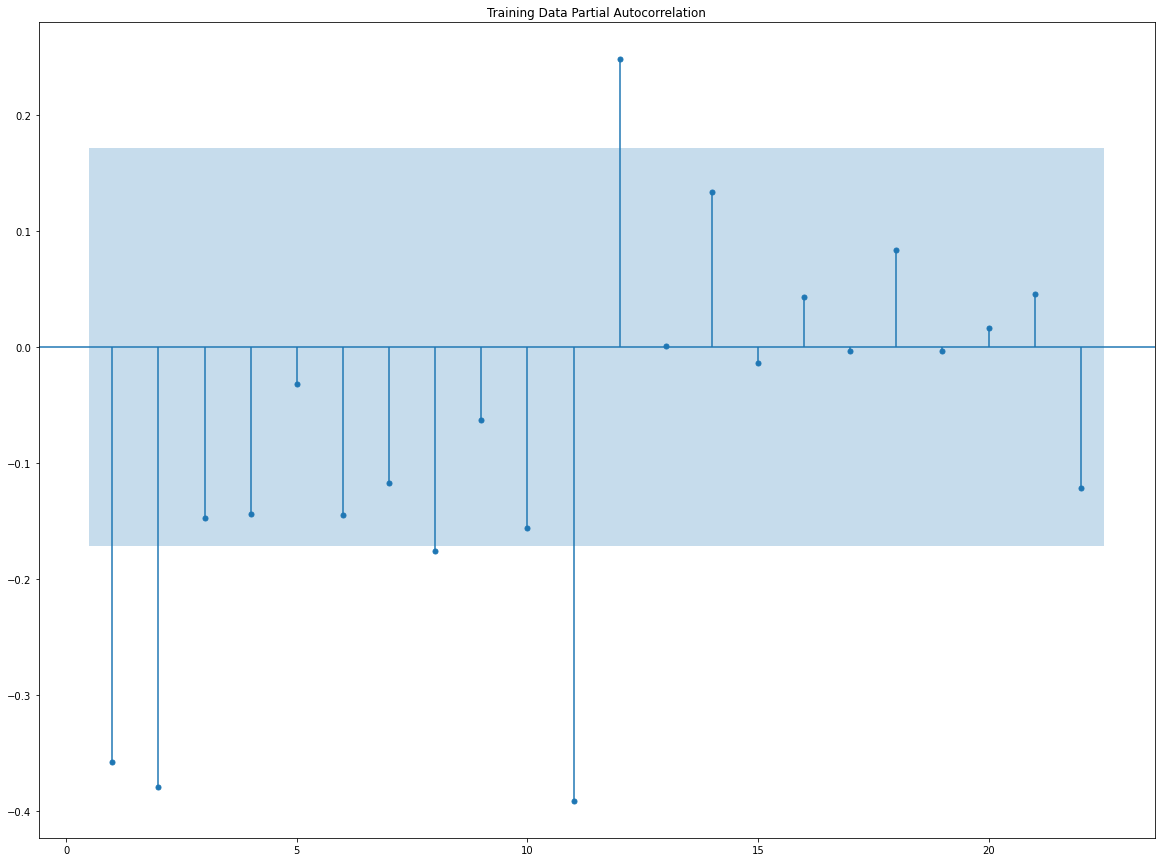

In [124]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

In [125]:
manual_ARIMA = ARIMA(train['Rose'], order=(3,1,3),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -632.334
Date:                Sun, 09 Oct 2022   AIC                           1278.668
Time:                        15:07:11   BIC                           1298.794
Sample:                    01-31-1980   HQIC                          1286.846
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5851      0.089    -17.908      0.000      -1.759      -1.412
ar.L2         -0.6412      0.142     -4.510      0.000      -0.920      -0.363
ar.L3          0.1329      0.090      1.484      0.1

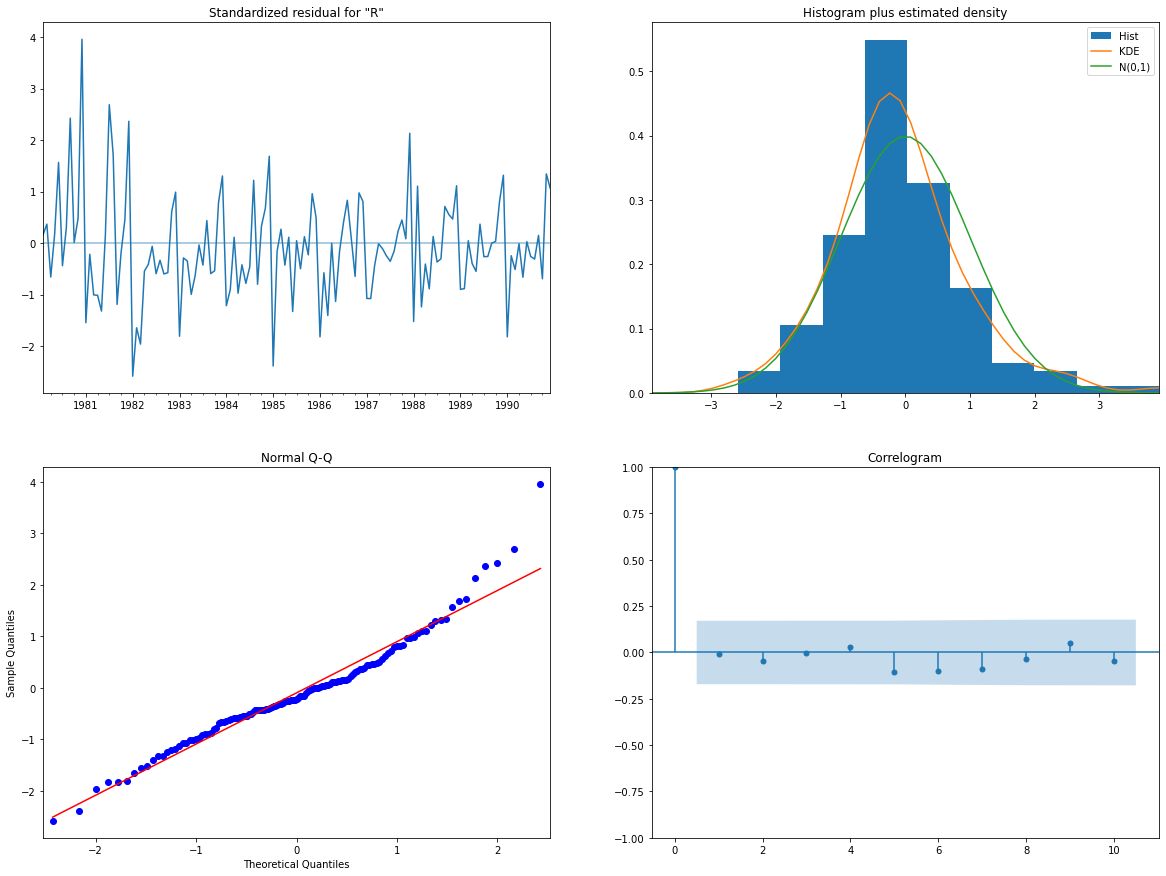

In [126]:
results_manual_ARIMA.plot_diagnostics();

In [127]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [128]:
rmse_model9 = mean_squared_error(test['Rose'],predicted_manual_ARIMA,squared=False)
rmse_model9

36.70132818681845

In [129]:
resultsDF10 = pd.DataFrame({'Test RMSE': [rmse_model9]}
                           ,index=['Manual ARIMA(3,1,3)'])

results = pd.concat([results, resultsDF10])
results

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
"Alpha=0.05,SimpleExponentialSmoothing",36.796227
"Alpha=0.05,DoubleExponentialSmoothing",15.268944
"Alpha=0.05,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",21.019620


#### SARIMA Model

In [130]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)


In [131]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [132]:
for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1264.4996261113859
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1144.7077471827401
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:1081.2713830625194
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1274.7897737087985
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1241.7870945149145
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1146.309326672227
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:1058.9861743124334
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1137.9167236212038
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1137.4533629515201
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1117.022442633377
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:1058.8048206424758
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:1072.5465834695271
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:1061.3687765139516
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:1058.0425052390726
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:1058.8803562293165
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1263.5369097383964
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1201.383254802954
SARIMA(0, 1, 1)x(0, 0, 2, 6) - 

In [133]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
187,"(2, 1, 3)","(2, 0, 3, 6)",951.744298
59,"(0, 1, 3)","(2, 0, 3, 6)",952.073632
251,"(3, 1, 3)","(2, 0, 3, 6)",952.582105
191,"(2, 1, 3)","(3, 0, 3, 6)",953.205612
123,"(1, 1, 3)","(2, 0, 3, 6)",953.684951


In [134]:
auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(2, 1, 3),
                                seasonal_order=(2, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 3)x(2, 0, 3, 6)   Log Likelihood                -464.872
Date:                           Sun, 09 Oct 2022   AIC                            951.744
Time:                                   15:10:12   BIC                            981.349
Sample:                               01-31-1980   HQIC                           963.750
                                    - 12-31-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5027      0.083     -6.080      0.000      -0.665      -0.341
ar.L2         -0.6628      0.084     -7.916

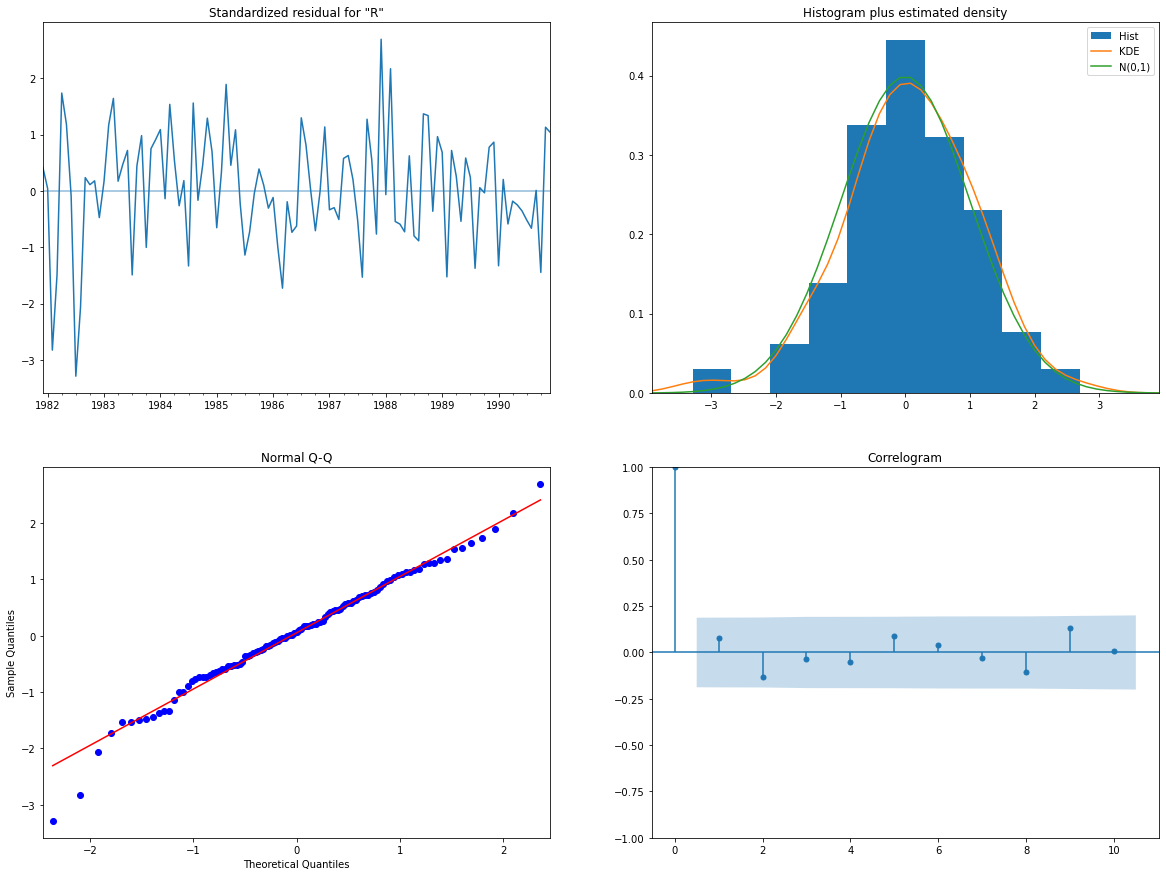

In [135]:
results_auto_SARIMA.plot_diagnostics();

In [136]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [137]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-31,66.900373,16.351038,34.852927,98.947819
1991-02-28,65.989241,16.482313,33.684502,98.293981
1991-03-31,74.438302,16.588274,41.925883,106.950721
1991-04-30,76.040208,16.710883,43.287479,108.792936
1991-05-31,78.413817,16.711494,45.659890,111.167744


In [138]:
rmse_model10 = mean_squared_error(test['Rose'],predicted_auto_SARIMA.predicted_mean,squared=False)
rmse_model10

27.12415602590978

In [139]:
resultsDF11 = pd.DataFrame({'Test RMSE': [rmse_model10]}
                           ,index=['SARIMA (2, 1, 3) (2, 0, 3, 6)'])

results = pd.concat([results, resultsDF11])
results

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
"Alpha=0.05,SimpleExponentialSmoothing",36.796227
"Alpha=0.05,DoubleExponentialSmoothing",15.268944
"Alpha=0.05,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",21.019620


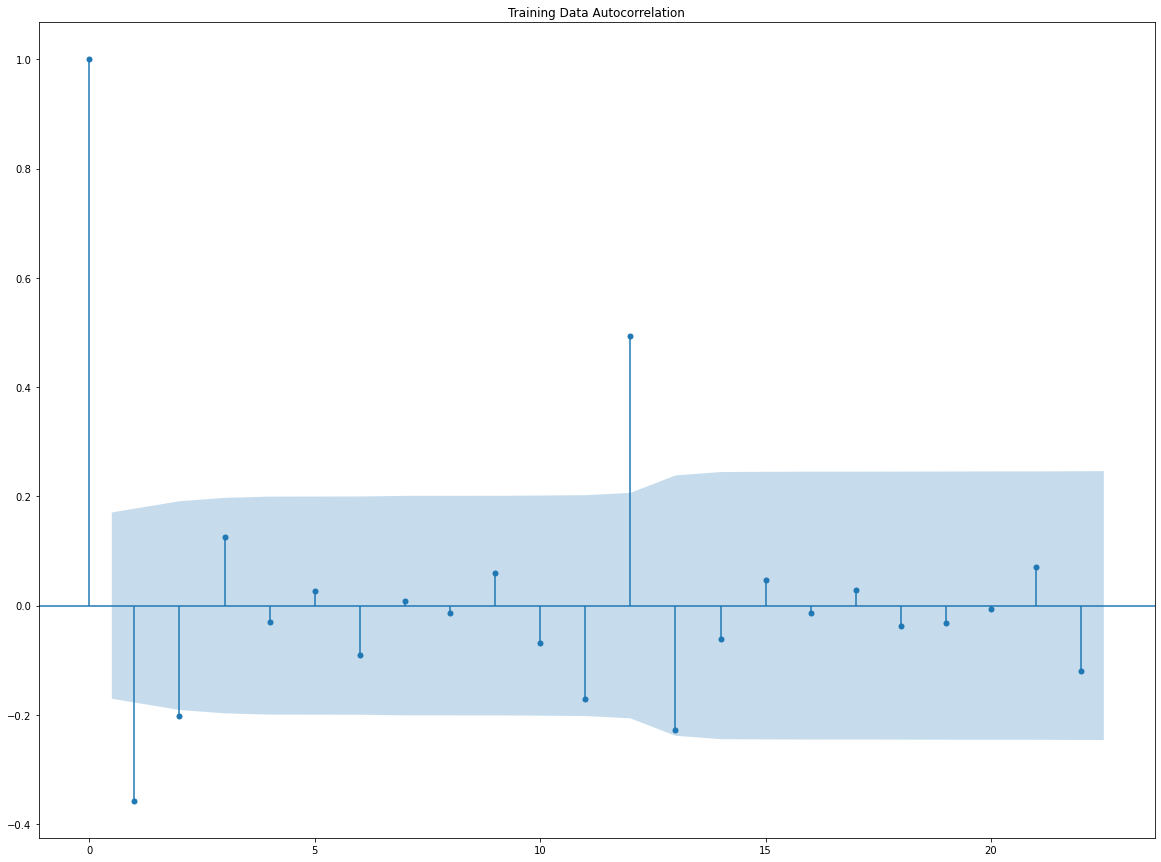

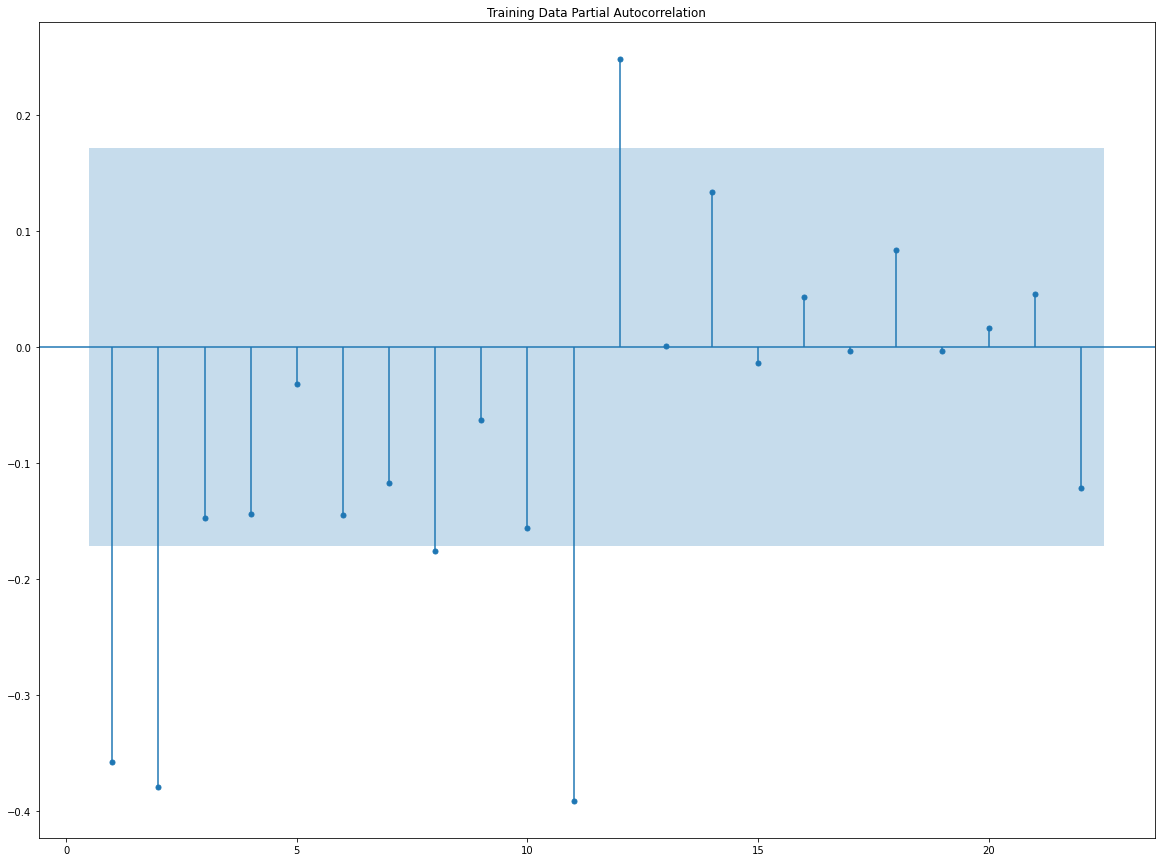

In [140]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle');

In [141]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(2,1,2),
                                seasonal_order=(2, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                         SARIMAX Results                                         
Dep. Variable:                                      Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 0, [1, 2, 3], 6)   Log Likelihood                -470.533
Date:                                   Sun, 09 Oct 2022   AIC                            961.066
Time:                                           15:10:15   BIC                            988.071
Sample:                                       01-31-1980   HQIC                           972.019
                                            - 12-31-1990                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4994      0.359      1.391      0.164    

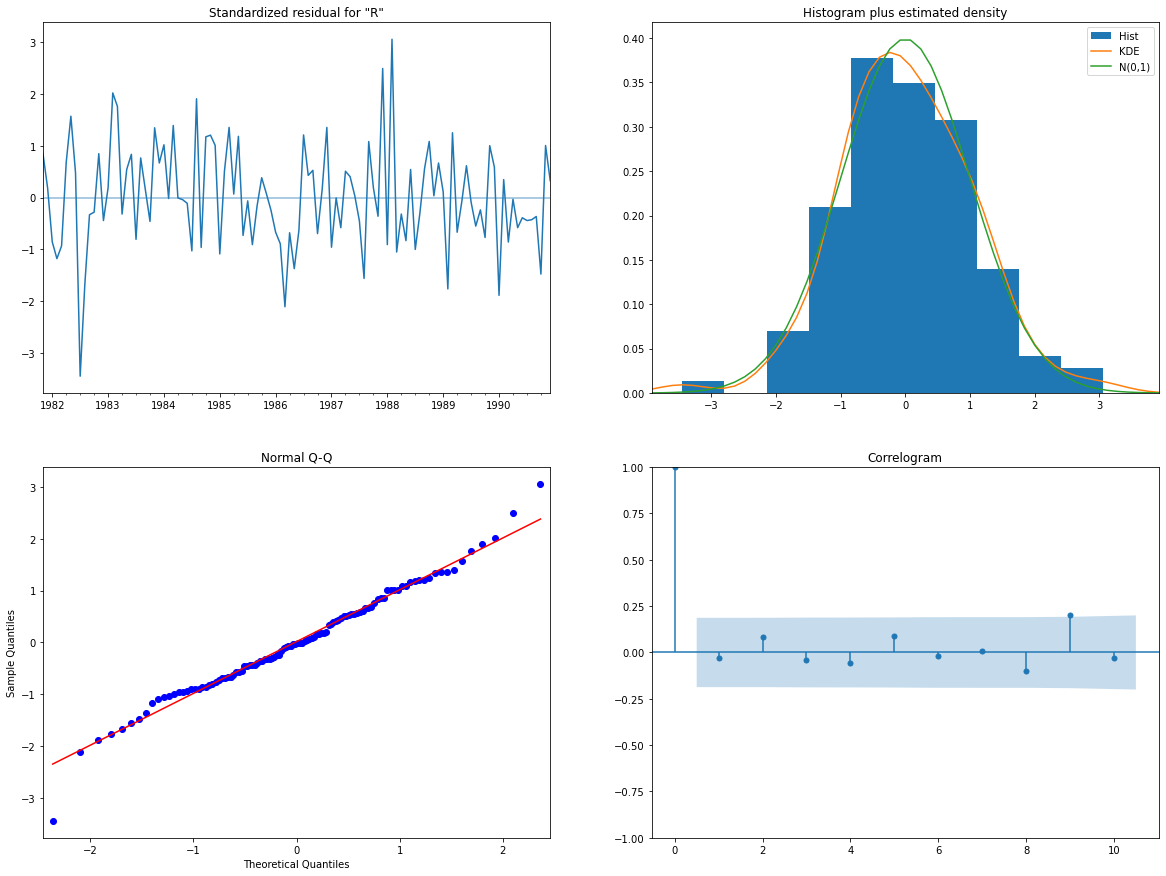

In [142]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [143]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [144]:
rmse_model11 = mean_squared_error(test['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)
rmse_model11

30.077539903552836

In [145]:
resultsDF12 = pd.DataFrame({'Test RMSE': [rmse_model11]}
                           ,index=['Manual SARIMA (2, 1, 2) (2, 0, 3, 6)'])

results = pd.concat([results, resultsDF12])
results

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
"Alpha=0.05,SimpleExponentialSmoothing",36.796227
"Alpha=0.05,DoubleExponentialSmoothing",15.268944
"Alpha=0.05,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",21.019620


### 8. Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [146]:
Final_results = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime']) #Linear Regression Model
Final_results = pd.concat([Final_results, resultsDF2]) #Naive Model
Final_results = pd.concat([Final_results, resultsDF3]) #Simple Average Model
Final_results = pd.concat([Final_results, resultsDF4]) #Moving Average with rolling points as 2, 4, 6, 9
Final_results = pd.concat([Final_results, resultsDF5]) #Single Exponential Smoothing
Final_results = pd.concat([Final_results, resultsDF6]) #Double Exponential Smoothing
Final_results = pd.concat([Final_results, resultsDF8]) #Triple Exponential Smoothing
Final_results = pd.concat([Final_results, resultsDF7]) #Triple Exponential Smoothing, alpha:0.3, beta:0.4, gamma:0.3
Final_results = pd.concat([Final_results, resultsDF9]) #Automated ARIMA Model
Final_results = pd.concat([Final_results, resultsDF10]) #Manual ARIMA Model
Final_results = pd.concat([Final_results, resultsDF11]) #Automated SARIMA Model
Final_results = pd.concat([Final_results, resultsDF12]) #Manual SARIMA Model
Final_results

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
"Alpha=0.05,SimpleExponentialSmoothing",36.796227
"Alpha=0.05,DoubleExponentialSmoothing",15.268944
"Alpha=0.05,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",21.019620


### 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

#### Triple Exponential Smoothing on Full Data

In [147]:
fullmodel = ExponentialSmoothing(rose2,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.3,
                                                                 smoothing_trend=0.4,
                                                                 smoothing_seasonal=0.3)

In [148]:
RMSE_fullmodel = metrics.mean_squared_error(rose2['Rose'],fullmodel.fittedvalues,squared=False)

print('Test RMSE:',RMSE_fullmodel)

Test RMSE: 20.672560612958677


In [149]:
prediction_1 = fullmodel.forecast(steps=12)

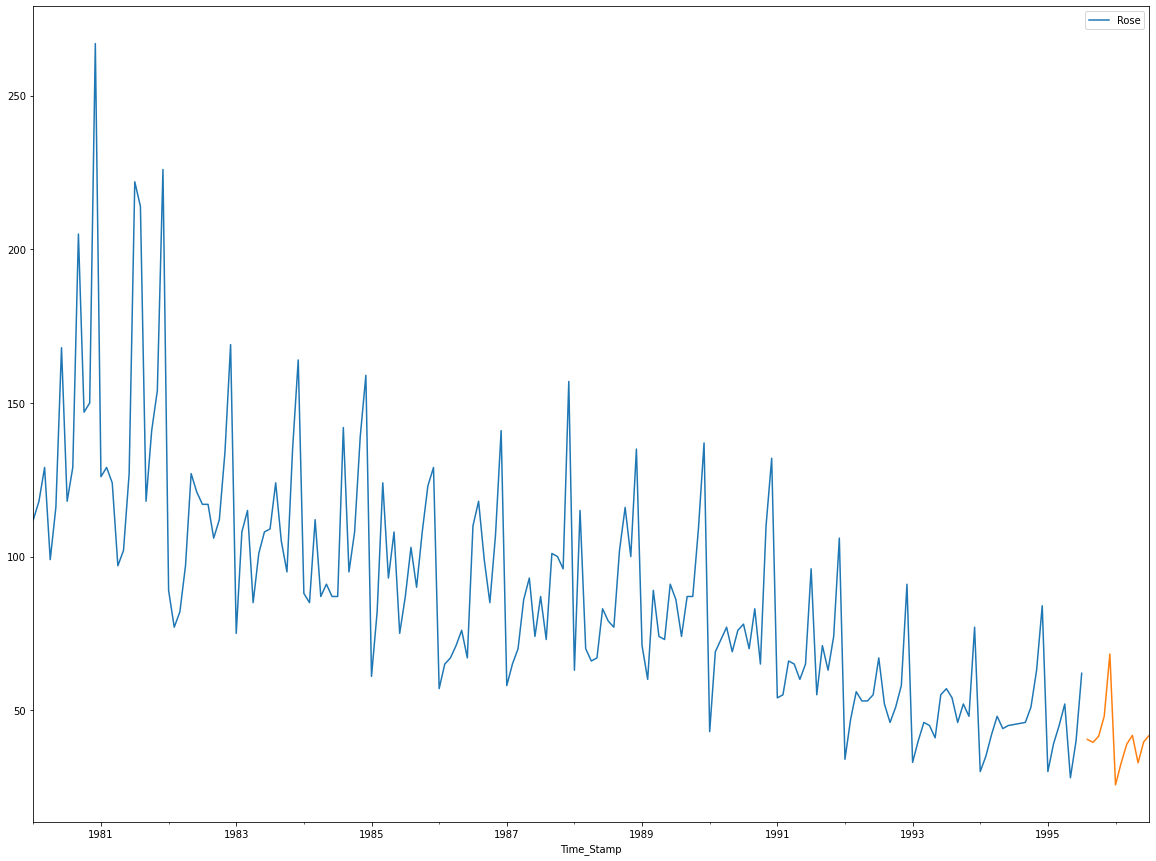

In [150]:
rose2.plot()
prediction_1.plot();

In [151]:
resultsDF13 = pd.DataFrame({'Test RMSE': [RMSE_fullmodel]}
                           ,index=['Full Data Triple Exponential Smoothing Alpha=0.3,Beta=0.4,Gamma=0.3'])

results = pd.concat([results, resultsDF13])
results

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
"Alpha=0.05,SimpleExponentialSmoothing",36.796227
"Alpha=0.05,DoubleExponentialSmoothing",15.268944
"Alpha=0.05,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",21.019620


In [164]:
prediction_1

1995-08-31    40.466300
1995-09-30    39.523150
1995-10-31    41.472534
1995-11-30    48.011556
1995-12-31    68.284698
1996-01-31    25.686713
1996-02-29    32.790354
1996-03-31    38.933980
1996-04-30    41.796356
1996-05-31    32.872602
1996-06-30    39.665793
1996-07-31    41.833690
Freq: M, dtype: float64

In [165]:
prediction_1.sum()

491.33772562354727

In [166]:
prediction_1.describe()

count    12.000000
mean     40.944810
std      10.320310
min      25.686713
25%      37.418636
50%      40.066046
75%      41.805689
max      68.284698
dtype: float64

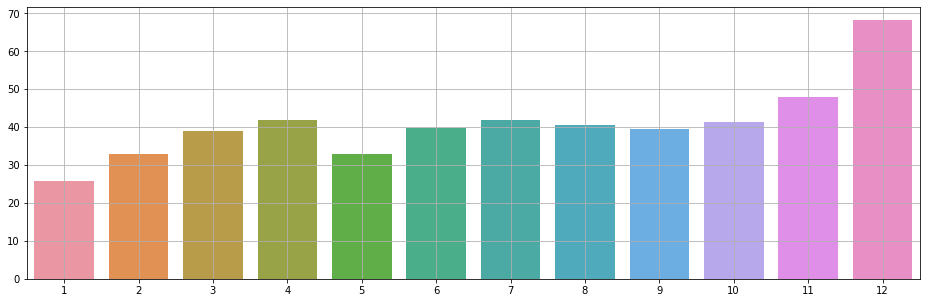

In [170]:
fig, ax = plt.subplots(figsize=(16,5))
sns.barplot(prediction_1.index.month, prediction_1, ax=ax)
plt.grid();

# END